In [ ]:
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
from numpy import linalg as LA
from scipy.spatial import distance
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from copy import deepcopy
from matplotlib.pyplot import figure

# Estudio de Horas

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Junio/Reyzamuronormalizado.csv')


In [ ]:
dfp=df.dropna()

In [ ]:
dfp

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,ADI,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y
0,0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,...,0.432765,-0.572304,1.808989,-0.429312,15,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251
1,1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,...,0.437488,-0.693327,1.407235,-0.539970,13,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251
2,2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,...,0.437333,-0.685713,1.423638,-0.594588,4,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,0.435799,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251
4,4,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.026994,-0.207726,-0.359948,-0.359948,-0.594237,0.085817,-0.078225,-0.144862,...,0.405304,-0.377744,3.047846,-0.206897,0,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,52086,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149347,-0.096841,-0.989742,-0.989742,0.267450,-0.357945,-0.153559,-0.143489,...,-0.272662,0.971227,-0.765160,-0.150504,20,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,0.419653,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251
52085,52088,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.646677,2.498988,2.041366,2.041366,-0.503996,-0.175929,0.674497,-0.173467,...,-2.766426,2.452114,-0.099984,1.316124,1,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251
52086,52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,...,-0.250605,0.981936,-0.621098,2.035873,19,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251


In [ ]:
DFperiods=dfp.iloc[:,2:16]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(DFperiods['hora'], DFperiods['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

### 2 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=2, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

In [ ]:
dfp

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y,cluster
0,0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,...,-0.572304,1.808989,-0.429312,15,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
1,1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,...,-0.693327,1.407235,-0.539970,13,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
2,2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,...,-0.685713,1.423638,-0.594588,4,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
4,4,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.026994,-0.207726,-0.359948,-0.359948,-0.594237,0.085817,-0.078225,-0.144862,...,-0.377744,3.047846,-0.206897,0,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,52086,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149347,-0.096841,-0.989742,-0.989742,0.267450,-0.357945,-0.153559,-0.143489,...,0.971227,-0.765160,-0.150504,20,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52085,52088,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.646677,2.498988,2.041366,2.041366,-0.503996,-0.175929,0.674497,-0.173467,...,2.452114,-0.099984,1.316124,1,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,1
52086,52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,...,0.981936,-0.621098,2.035873,19,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0


In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]


In [ ]:
df_cluster1

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y,cluster
0,0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,...,-0.572304,1.808989,-0.429312,15,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
1,1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,...,-0.693327,1.407235,-0.539970,13,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
2,2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,...,-0.685713,1.423638,-0.594588,4,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
4,4,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.026994,-0.207726,-0.359948,-0.359948,-0.594237,0.085817,-0.078225,-0.144862,...,-0.377744,3.047846,-0.206897,0,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52082,52085,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149981,-0.213632,-0.328908,-0.328908,-0.739676,0.478470,-0.150465,-0.169645,...,-0.613301,-0.474467,-0.640294,8,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52083,52086,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149347,-0.096841,-0.989742,-0.989742,0.267450,-0.357945,-0.153559,-0.143489,...,0.971227,-0.765160,-0.150504,20,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52086,52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,...,0.981936,-0.621098,2.035873,19,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0


In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')


In [ ]:
grupo_cluster1

,hora,cantidad
0,0,1807
1,1,1795
2,2,1823
3,3,1840
4,4,1815
5,5,1722
6,6,1976
7,7,2119
8,8,2193
9,9,2238


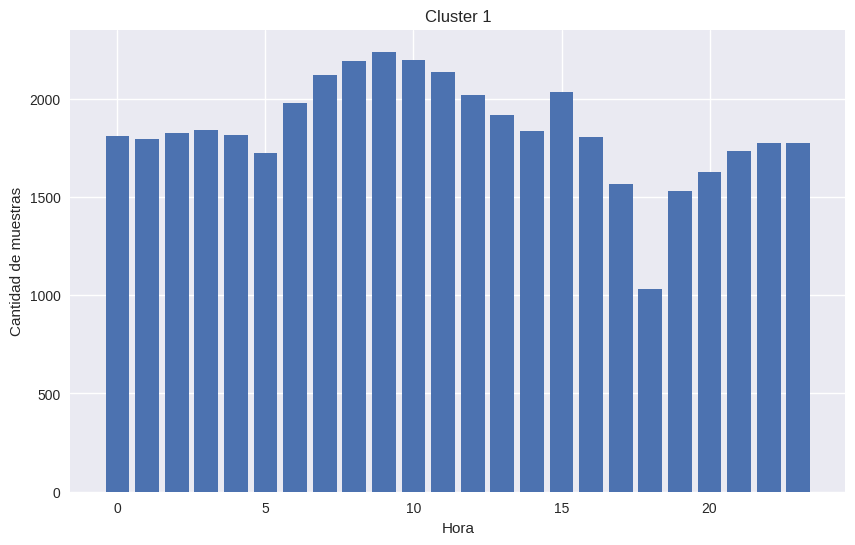

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

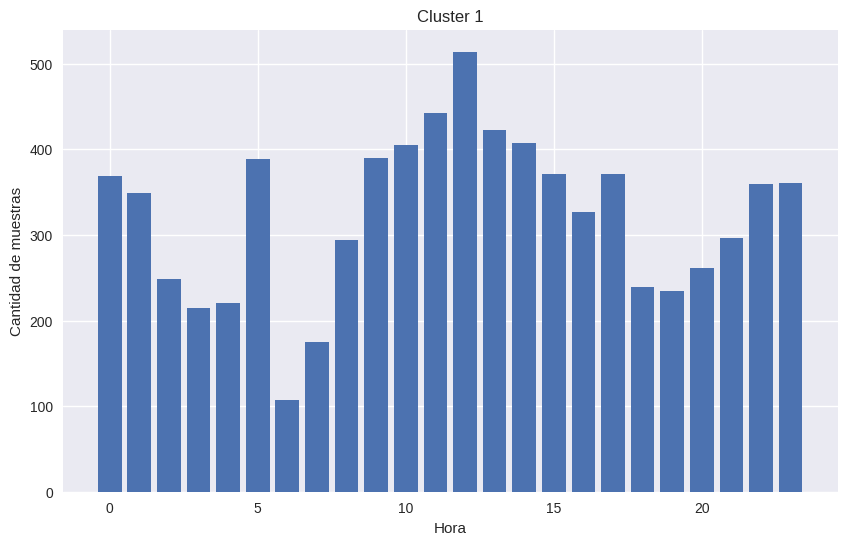

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

### 3 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=3, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

NameError: ignored

In [ ]:
dfp

NameError: ignored

In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]

In [ ]:
df_cluster1

,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,AnthroEnergy,BioEnergy,BI,ADI,AEI,LFC,ACTspMean,hora,site,cluster
0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,-0.092716,-0.029981,-0.078429,0.432765,-0.572304,1.808989,-0.429312,15,RZUH04,0
1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,-0.028375,-0.062458,-0.755410,0.437488,-0.693327,1.407235,-0.539970,13,RZUH04,0
2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,0.008055,-0.038026,0.205239,0.437333,-0.685713,1.423638,-0.594588,4,RZUH04,0
3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,0.019508,-0.043108,-0.143523,0.435799,-0.628553,2.537205,-0.048898,12,RZUH04,0
5,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.105213,-0.200060,0.437641,0.437641,-0.885135,-0.001195,1.010282,-0.160978,-0.068736,-0.033696,0.067046,0.390054,-0.265426,1.955621,0.676260,5,RZUH04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.073139,-0.212383,1.203291,1.203291,-0.787652,-0.327535,-0.106989,-0.171029,-0.149324,-0.073043,-1.050865,0.437289,-0.679912,-0.409056,-0.405093,14,RZUG09,0
52085,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149981,-0.213632,-0.328908,-0.328908,-0.739676,0.478470,-0.150465,-0.169645,-0.148324,-0.072649,-0.742282,0.435036,-0.613301,-0.474467,-0.640294,8,RZUG09,0
52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,-0.150128,-0.066343,0.079444,0.419653,-0.442917,-0.662598,-0.107443,2,RZUG09,0
52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,-0.149492,-0.067702,-0.148099,-0.250605,0.981936,-0.621098,2.035873,19,RZUG09,0


In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')

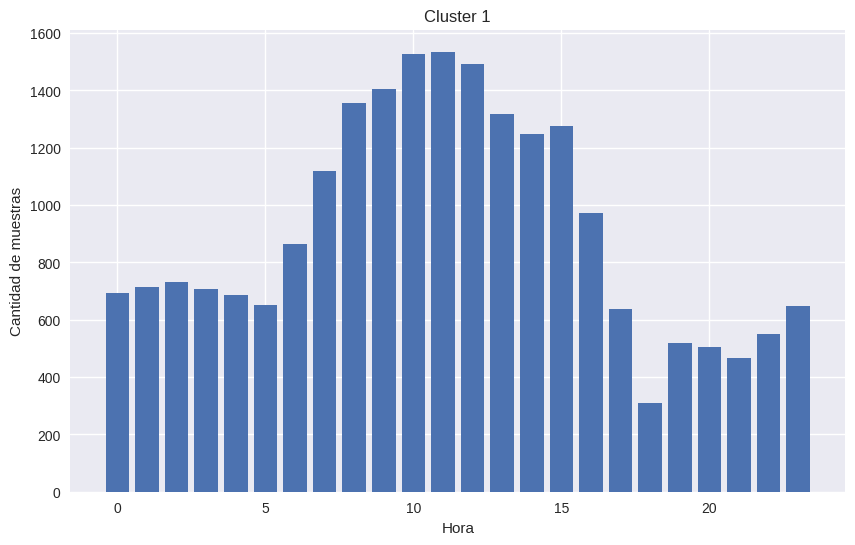

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

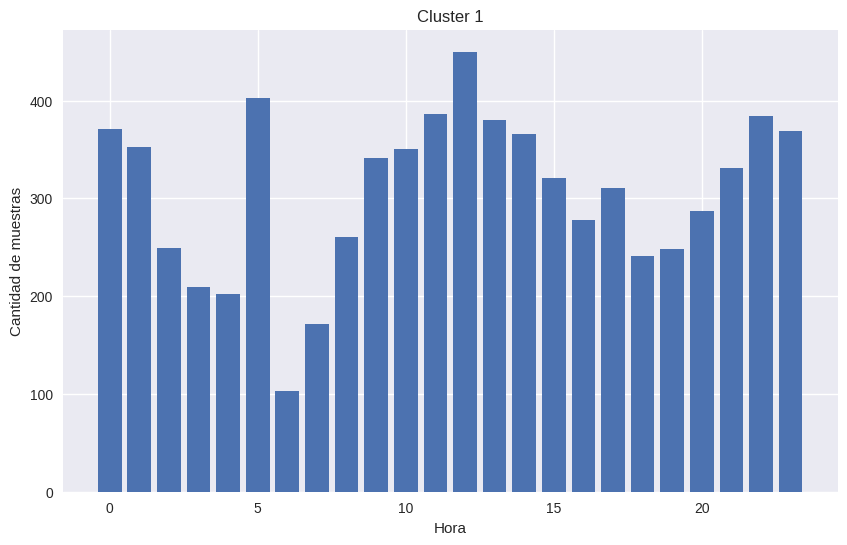

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

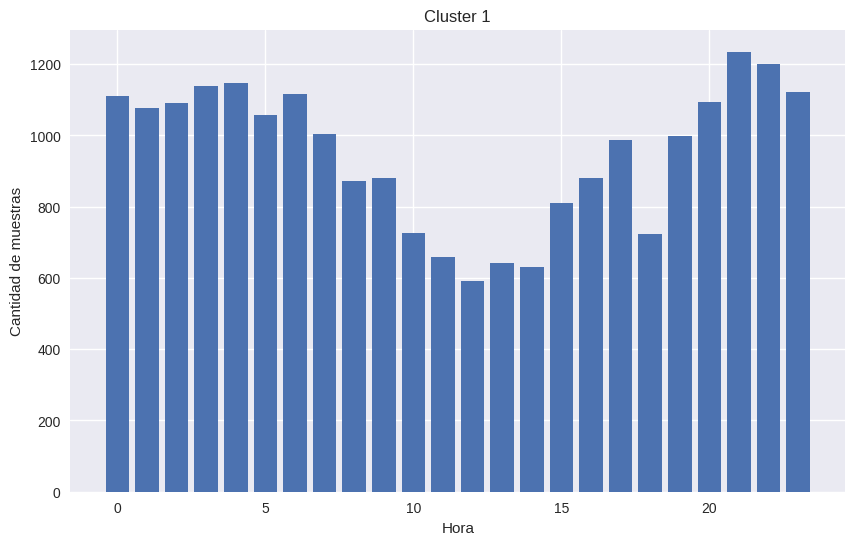

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

### 4 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=4, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

In [ ]:
dfp

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y,cluster
0,0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,...,-0.572304,1.808989,-0.429312,15,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,2
1,1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,...,-0.693327,1.407235,-0.539970,13,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,2
2,2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,...,-0.685713,1.423638,-0.594588,4,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,2
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
4,4,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.026994,-0.207726,-0.359948,-0.359948,-0.594237,0.085817,-0.078225,-0.144862,...,-0.377744,3.047846,-0.206897,0,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,52086,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149347,-0.096841,-0.989742,-0.989742,0.267450,-0.357945,-0.153559,-0.143489,...,0.971227,-0.765160,-0.150504,20,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,1
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52085,52088,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.646677,2.498988,2.041366,2.041366,-0.503996,-0.175929,0.674497,-0.173467,...,2.452114,-0.099984,1.316124,1,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,3
52086,52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,...,0.981936,-0.621098,2.035873,19,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0


In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]
df_cluster4 = df1.loc[df1['cluster'] == 3]

In [ ]:
df_cluster1

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y,cluster
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
5,5,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.105213,-0.200060,0.437641,0.437641,-0.885135,-0.001195,1.010282,-0.160978,...,-0.265426,1.955621,0.676260,5,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
7,7,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.092536,-0.201270,0.536159,0.536159,-0.030568,-0.022602,0.758711,-0.173902,...,-0.582290,3.765391,-0.375550,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
17,17,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.135780,-0.196925,0.505569,0.505569,-1.045856,-0.579779,0.945868,-0.170586,...,-0.700488,1.965699,-0.360744,6,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
23,23,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.116033,-0.197763,0.389507,0.389507,-1.037948,-0.080657,0.758945,-0.170812,...,-0.693118,1.570071,-0.403478,6,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52076,52079,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.102107,-0.208271,2.108844,2.108844,-0.179633,0.396795,-0.264127,-0.138739,...,-0.597743,-0.672083,-0.186720,4,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52079,52082,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.041958,-0.184915,2.857849,2.857849,0.436271,0.147078,0.352916,-0.138883,...,2.011943,0.238137,2.653513,3,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52080,52083,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.073139,-0.212383,1.203291,1.203291,-0.787652,-0.327535,-0.106989,-0.171029,...,-0.679912,-0.409056,-0.405093,14,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,0


In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster4 = df_cluster4.groupby('hora').size().reset_index(name='cantidad')

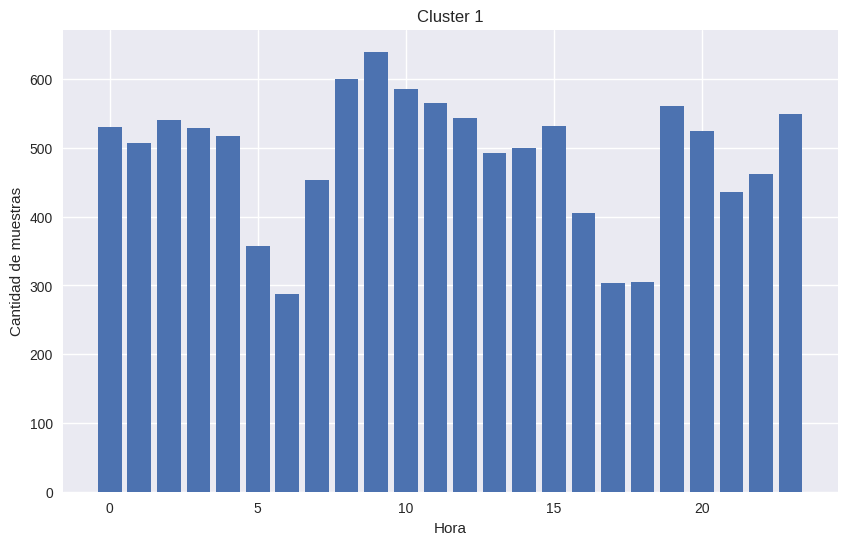

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

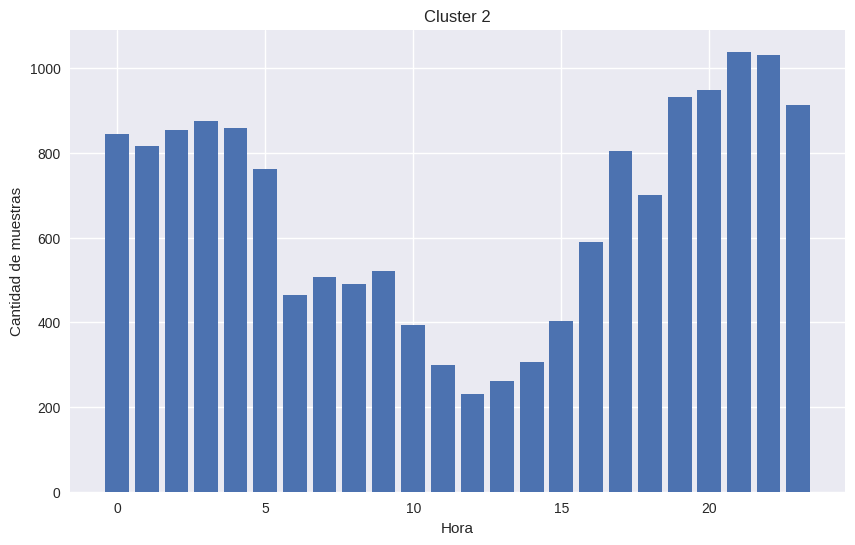

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 2')
plt.show()

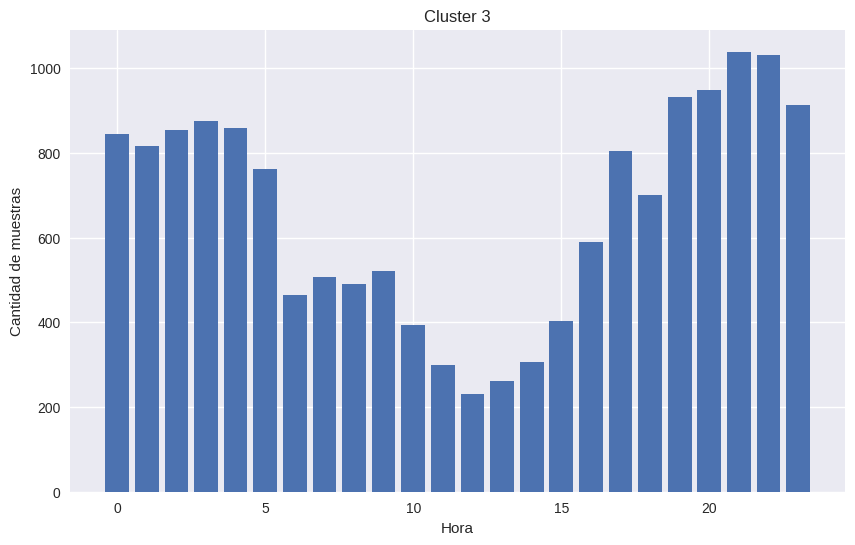

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 3')
plt.show()

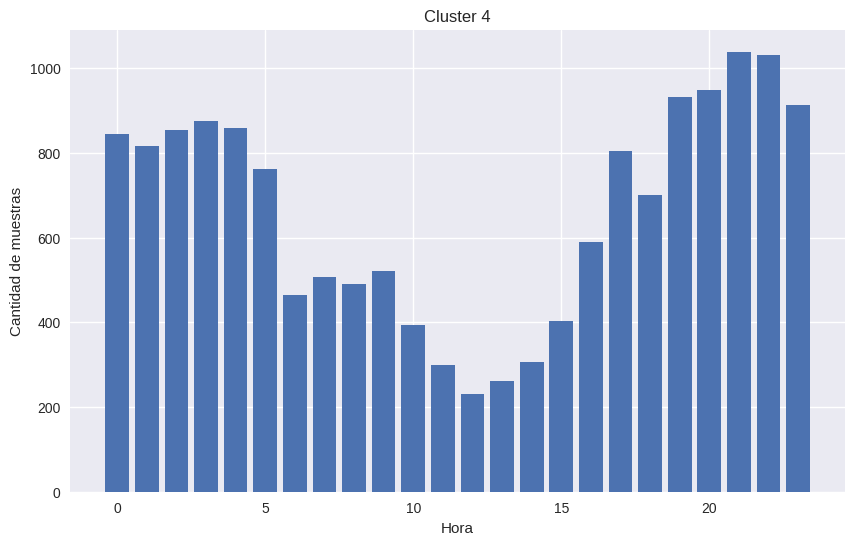

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster4['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 4')
plt.show()

### 5 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=5, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]
df_cluster4 = df1.loc[df1['cluster'] == 3]
df_cluster5 = df1.loc[df1['cluster'] == 4]

In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster4 = df_cluster4.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster5 = df_cluster5.groupby('hora').size().reset_index(name='cantidad')

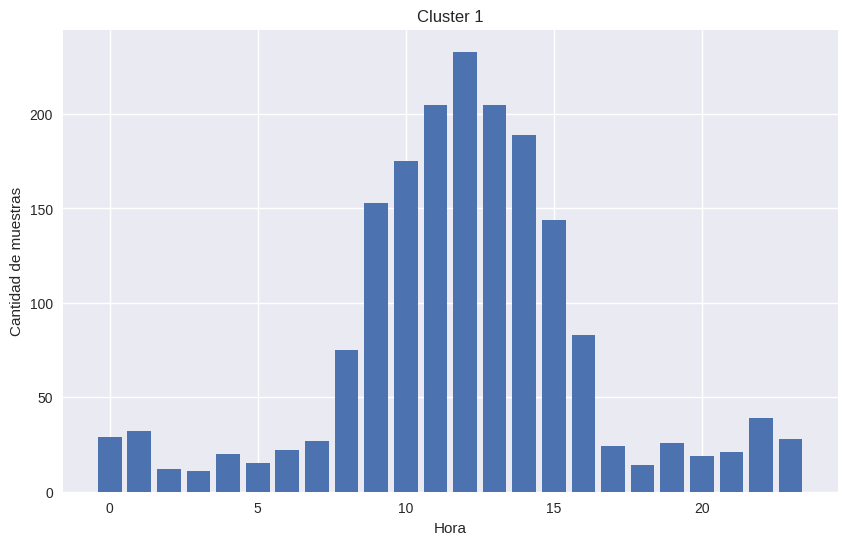

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

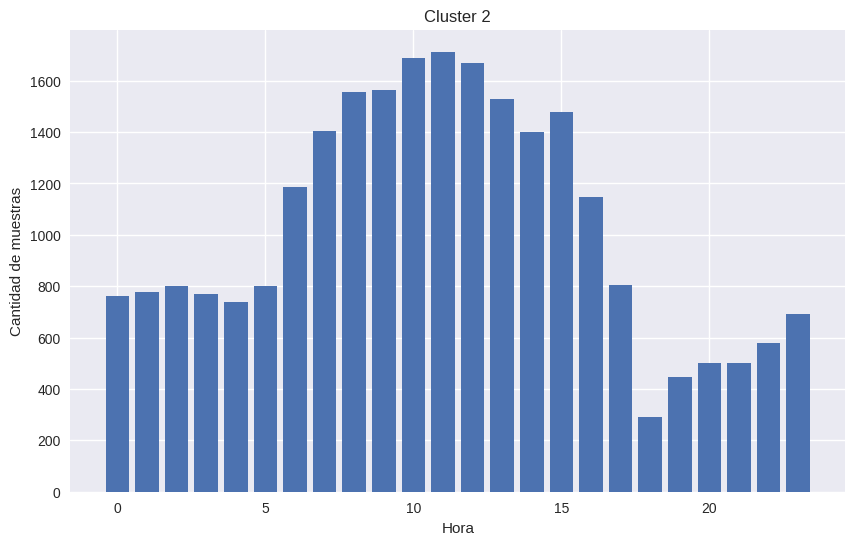

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 2')
plt.show()

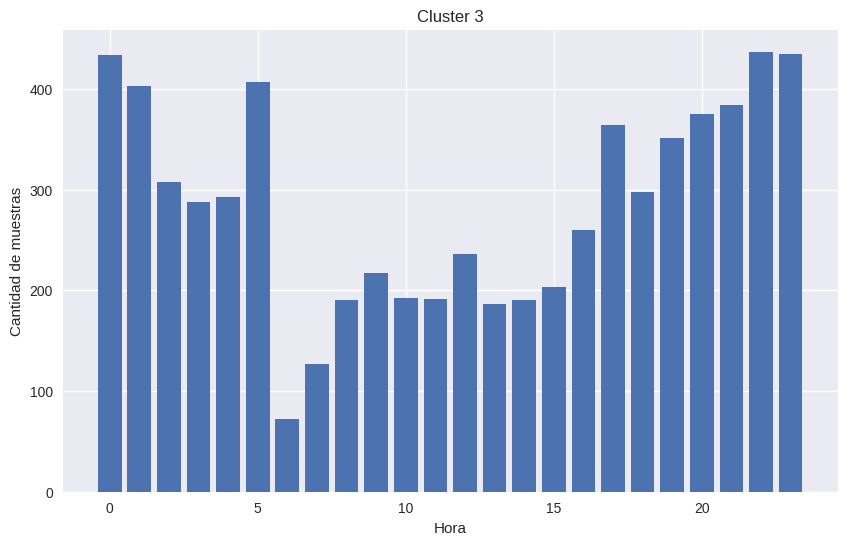

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 3')
plt.show()

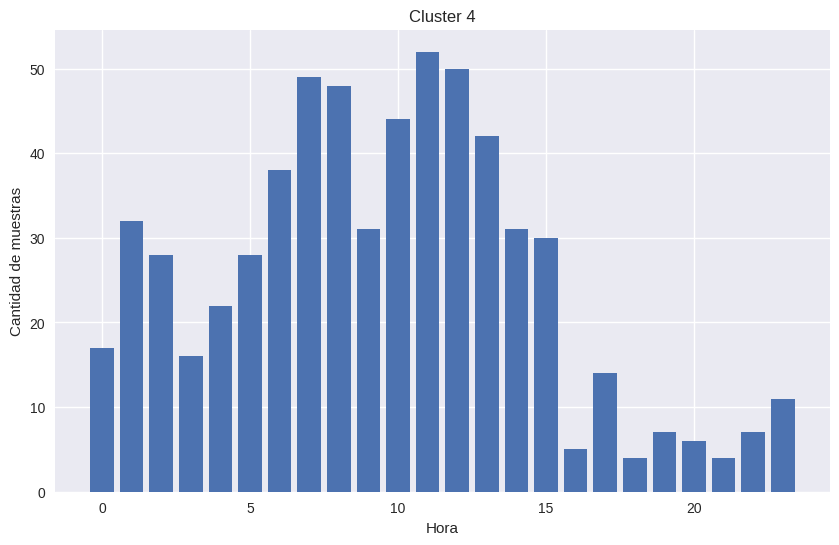

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster4['hora'], grupo_cluster4['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 4')
plt.show()

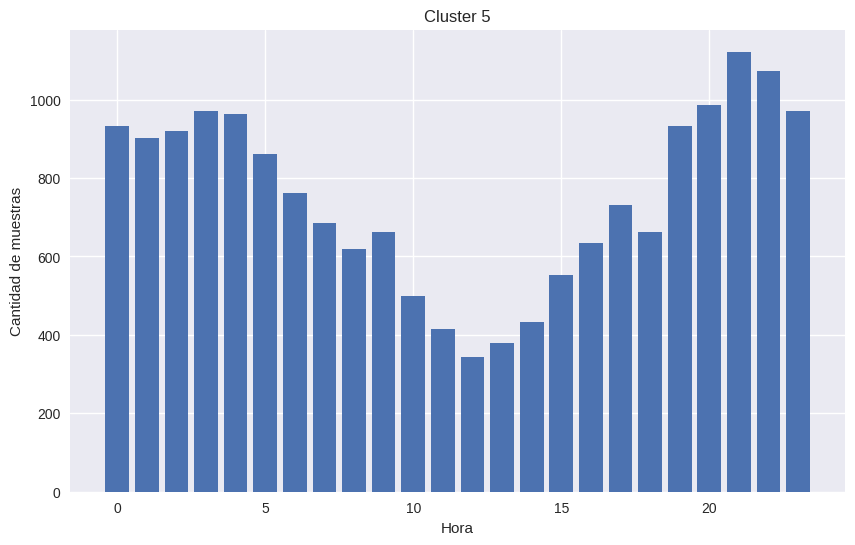

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster5['hora'], grupo_cluster5['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 5')
plt.show()

### 6 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=6, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

In [ ]:
dfp

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y,cluster
0,0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,...,-0.572304,1.808989,-0.429312,15,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
1,1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,...,-0.693327,1.407235,-0.539970,13,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
2,2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,...,-0.685713,1.423638,-0.594588,4,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
4,4,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.026994,-0.207726,-0.359948,-0.359948,-0.594237,0.085817,-0.078225,-0.144862,...,-0.377744,3.047846,-0.206897,0,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,52086,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149347,-0.096841,-0.989742,-0.989742,0.267450,-0.357945,-0.153559,-0.143489,...,0.971227,-0.765160,-0.150504,20,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,4
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,5
52085,52088,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.646677,2.498988,2.041366,2.041366,-0.503996,-0.175929,0.674497,-0.173467,...,2.452114,-0.099984,1.316124,1,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,2
52086,52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,...,0.981936,-0.621098,2.035873,19,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,5


In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]
df_cluster4 = df1.loc[df1['cluster'] == 3]
df_cluster5 = df1.loc[df1['cluster'] == 4]
df_cluster6 = df1.loc[df1['cluster'] == 5]

In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster4 = df_cluster4.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster5 = df_cluster5.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster6 = df_cluster6.groupby('hora').size().reset_index(name='cantidad')

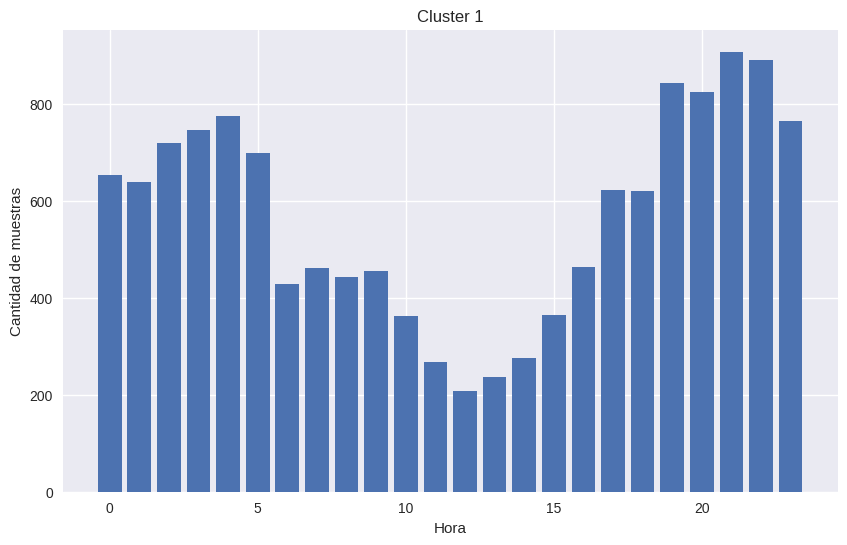

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

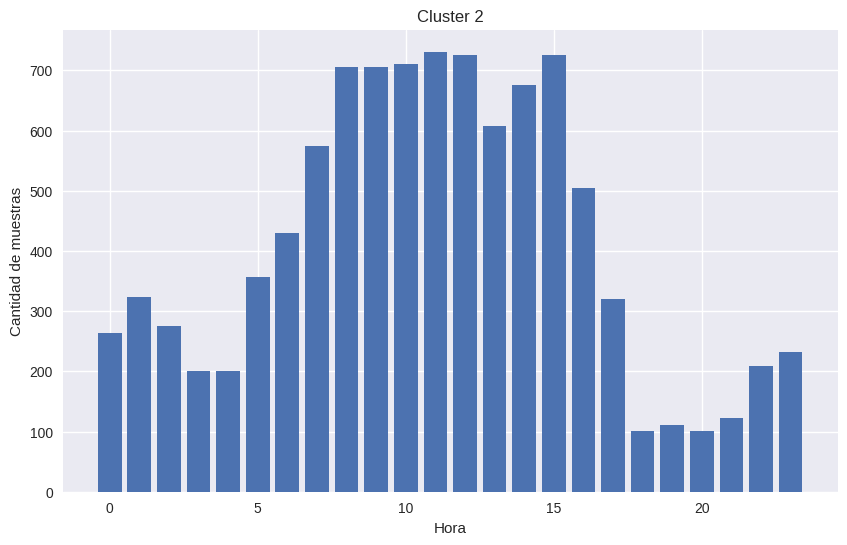

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 2')
plt.show()

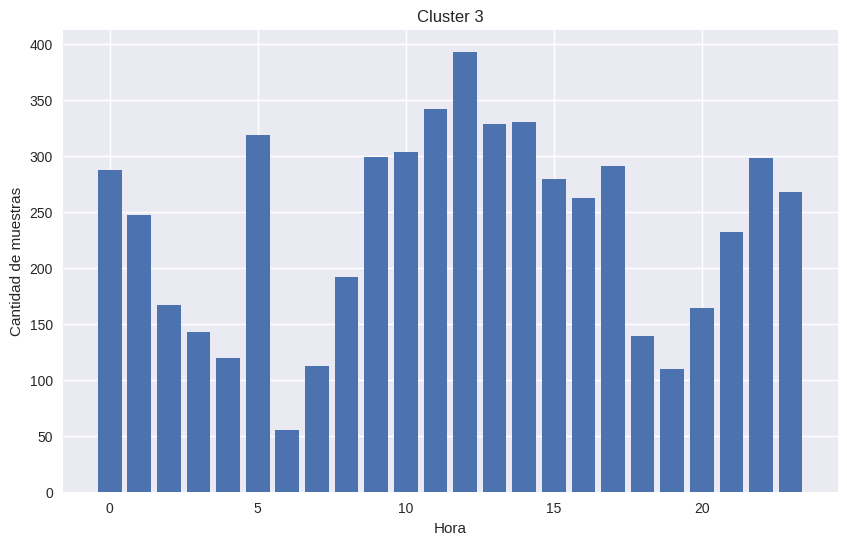

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 3')
plt.show()

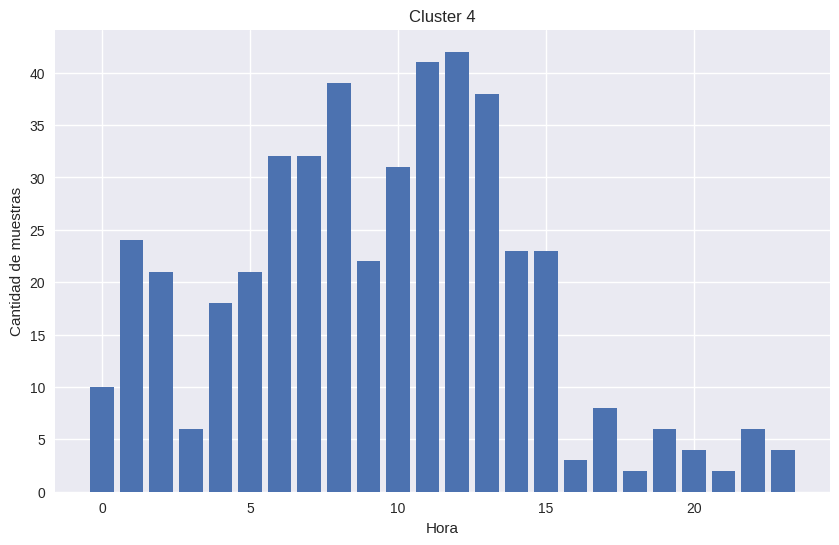

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster4['hora'], grupo_cluster4['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 4')
plt.show()

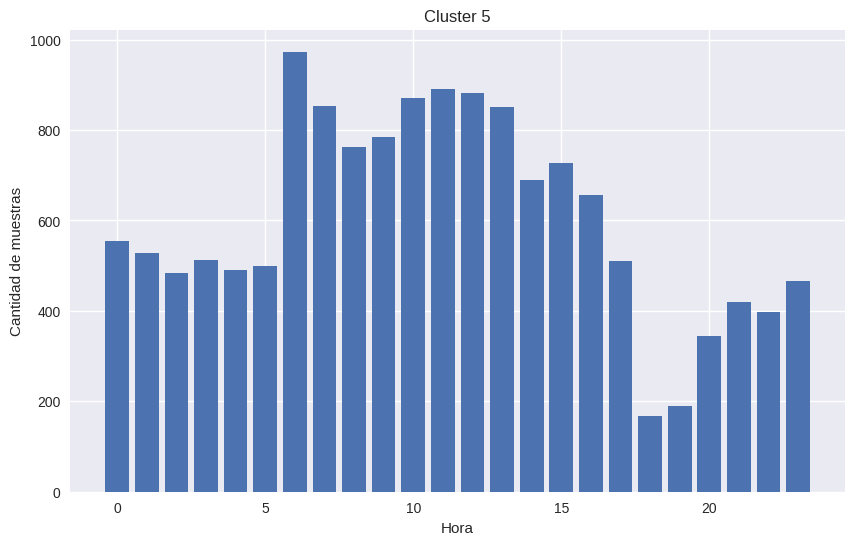

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster5['hora'], grupo_cluster5['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 5')
plt.show()

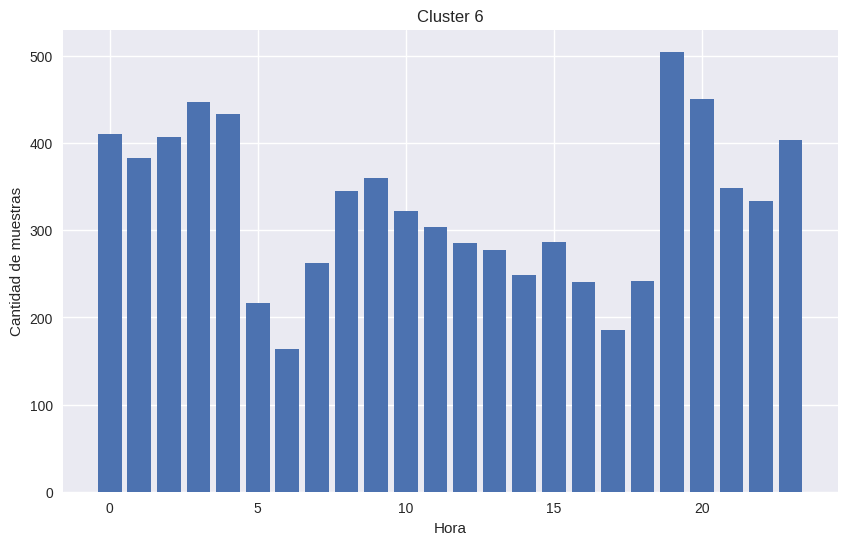

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster6['hora'], grupo_cluster6['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 6')
plt.show()

### 7 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=7, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

In [ ]:
dfp

,Unnamed: 0,file,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,...,AEI,LFC,ACTspMean,hora,site,latitude_IG,longitud_IG,YCOORD.y,XCOORD.y,cluster
0,0,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.070549,-0.211764,-0.064844,-0.064844,-0.271830,-0.395867,0.533129,-0.153738,...,-0.572304,1.808989,-0.429312,15,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
1,1,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.100172,-0.194916,0.058415,0.058415,-0.986871,-0.706752,0.533088,-0.172235,...,-0.693327,1.407235,-0.539970,13,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
2,2,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.074244,-0.210081,-0.373443,-0.373443,-0.902187,-0.333524,0.325901,-0.168358,...,-0.685713,1.423638,-0.594588,4,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,2
3,3,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.097311,-0.201308,0.284241,0.284241,-0.994661,-0.137181,0.807133,-0.169657,...,-0.628553,2.537205,-0.048898,12,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
4,4,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.026994,-0.207726,-0.359948,-0.359948,-0.594237,0.085817,-0.078225,-0.144862,...,-0.377744,3.047846,-0.206897,0,RZUH04,"3,5448817","-73,386605",1949742.623,4957101.251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52083,52086,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.149347,-0.096841,-0.989742,-0.989742,0.267450,-0.357945,-0.153559,-0.143489,...,0.971227,-0.765160,-0.150504,20,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,6
52084,52087,//home/vmartinezarias/Documents/Zamuro/Ultraso...,0.119162,-0.205993,2.117841,2.117841,-0.178947,0.076378,-0.352250,-0.118488,...,-0.442917,-0.662598,-0.107443,2,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,3
52085,52088,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.646677,2.498988,2.041366,2.041366,-0.503996,-0.175929,0.674497,-0.173467,...,2.452114,-0.099984,1.316124,1,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,4
52086,52089,//home/vmartinezarias/Documents/Zamuro/Ultraso...,-0.166340,-0.172413,2.251897,2.251897,-0.375586,-0.890147,0.257029,-0.135499,...,0.981936,-0.621098,2.035873,19,RZUG09,"3,5269582","-73,3900327",1947742.623,4956701.251,3


In [ ]:
df1=dfp.copy()

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]
df_cluster4 = df1.loc[df1['cluster'] == 3]
df_cluster5 = df1.loc[df1['cluster'] == 4]
df_cluster6 = df1.loc[df1['cluster'] == 5]
df_cluster7 = df1.loc[df1['cluster'] == 6]

In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster4 = df_cluster4.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster5 = df_cluster5.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster6 = df_cluster6.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster7 = df_cluster7.groupby('hora').size().reset_index(name='cantidad')

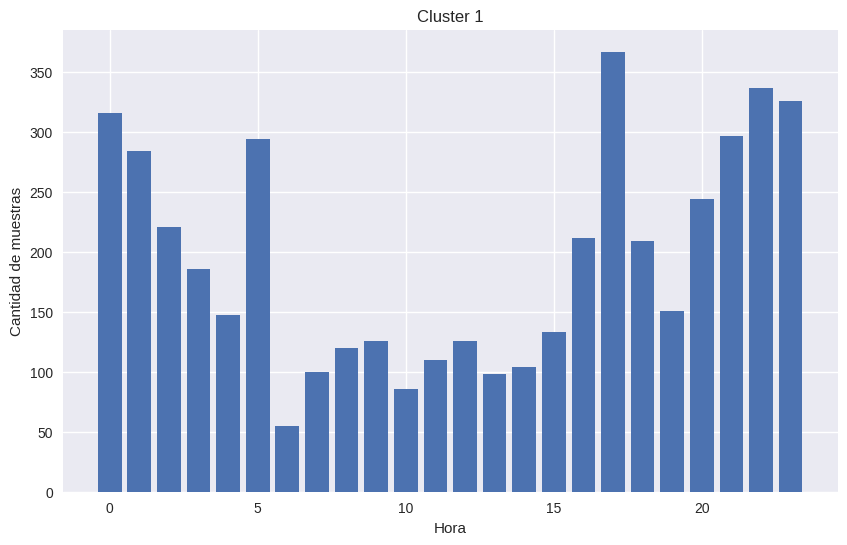

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

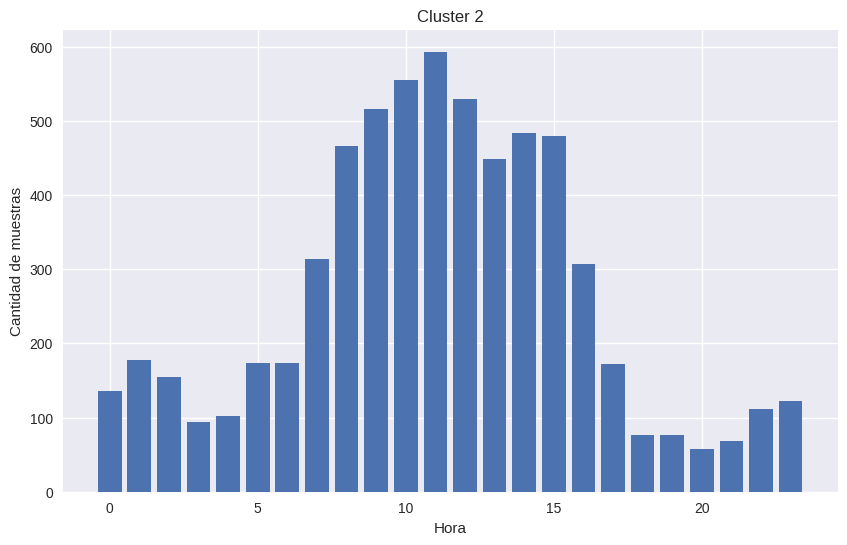

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 2')
plt.show()

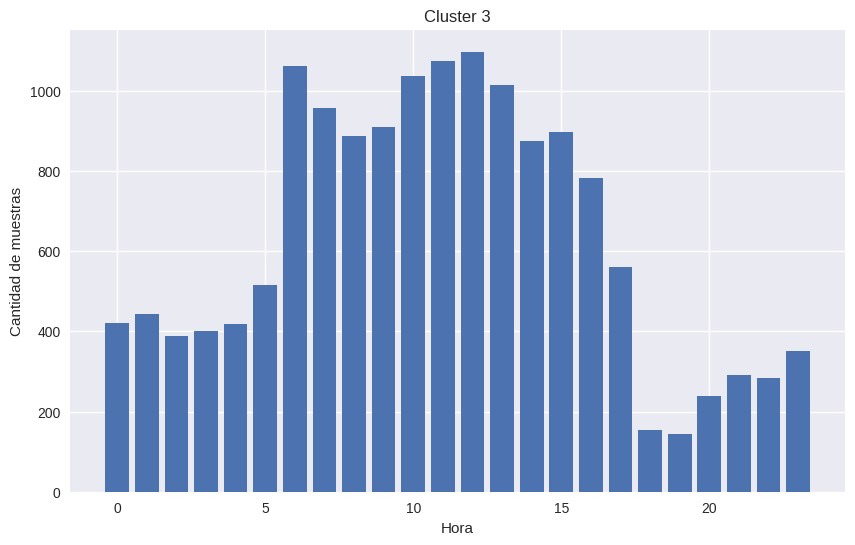

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 3')
plt.show()

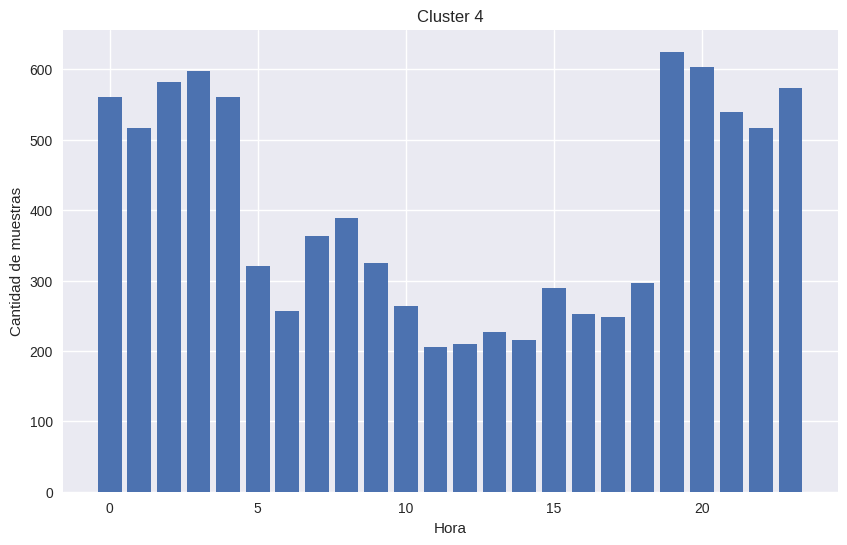

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster4['hora'], grupo_cluster4['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 4')
plt.show()

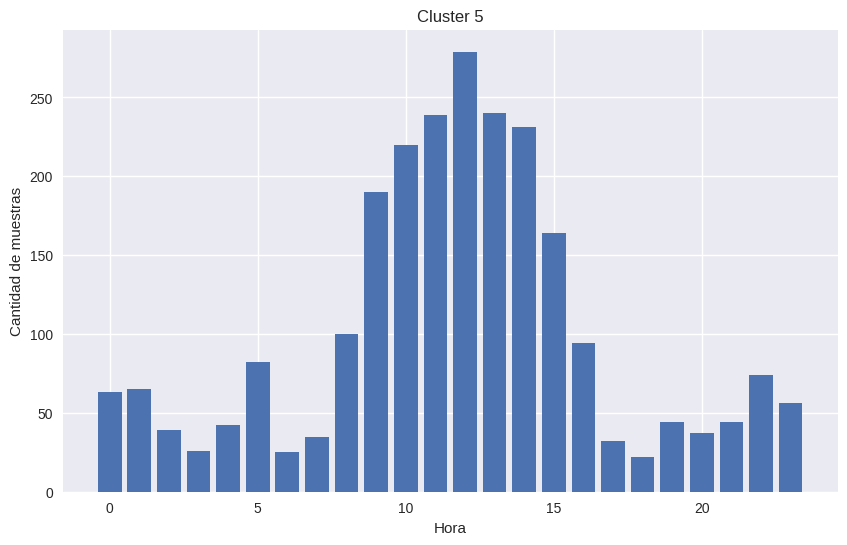

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster5['hora'], grupo_cluster5['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 5')
plt.show()

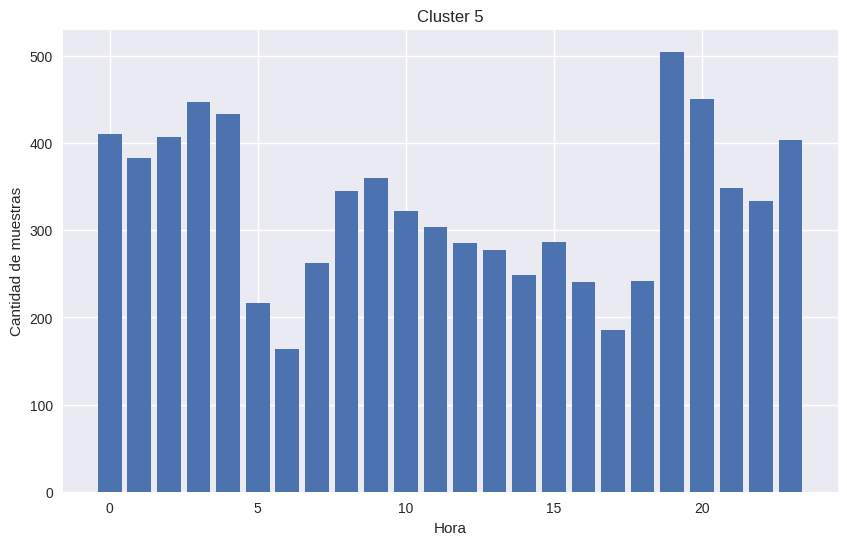

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster6['hora'], grupo_cluster6['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 5')
plt.show()

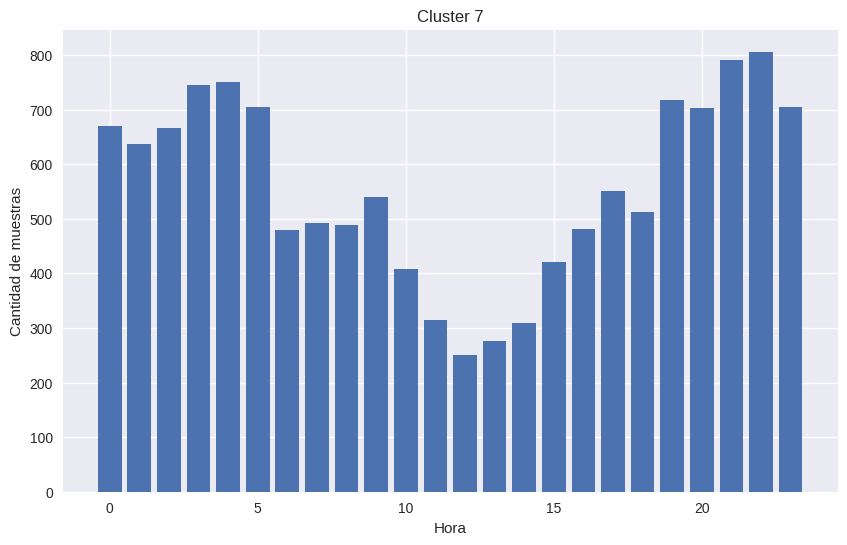

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster7['hora'], grupo_cluster7['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 7')
plt.show()

### 13 periodos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

kmeans_model = MiniBatchKMeans(n_clusters=13, random_state=1)
kmeans_model.fit(DFperiods)

# Obtener las etiquetas del cluster y agregarlas a la lista de etiquetas
cluster_labels = kmeans_model.predict(DFperiods)
dfp['cluster'] = cluster_labels

In [ ]:
df1=dfp.copy()

In [ ]:
df1['cluster'].value_counts()

4     9374
1     8324
11    6018
12    5572
10    5399
0     5065
2     3876
5     2410
8     2296
3     2135
7     1080
9      373
6      157
Name: cluster, dtype: int64

In [ ]:
df_cluster1 = df1.loc[df1['cluster'] == 0]
df_cluster2 = df1.loc[df1['cluster'] == 1]
df_cluster3 = df1.loc[df1['cluster'] == 2]
df_cluster4 = df1.loc[df1['cluster'] == 3]
df_cluster5 = df1.loc[df1['cluster'] == 4]
df_cluster6 = df1.loc[df1['cluster'] == 5]
df_cluster7 = df1.loc[df1['cluster'] == 6]
df_cluster8 = df1.loc[df1['cluster'] == 7]
df_cluster9 = df1.loc[df1['cluster'] == 8]
df_cluster10 = df1.loc[df1['cluster'] == 9]
df_cluster11 = df1.loc[df1['cluster'] == 10]
df_cluster12 = df1.loc[df1['cluster'] == 11]
df_cluster13 = df1.loc[df1['cluster'] == 12]


In [ ]:
grupo_cluster1 = df_cluster1.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster2 = df_cluster2.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster3 = df_cluster3.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster4 = df_cluster4.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster5 = df_cluster5.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster6 = df_cluster6.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster7 = df_cluster7.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster8 = df_cluster8.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster9 = df_cluster9.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster10 = df_cluster10.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster11 = df_cluster11.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster12 = df_cluster12.groupby('hora').size().reset_index(name='cantidad')
grupo_cluster13 = df_cluster13.groupby('hora').size().reset_index(name='cantidad')


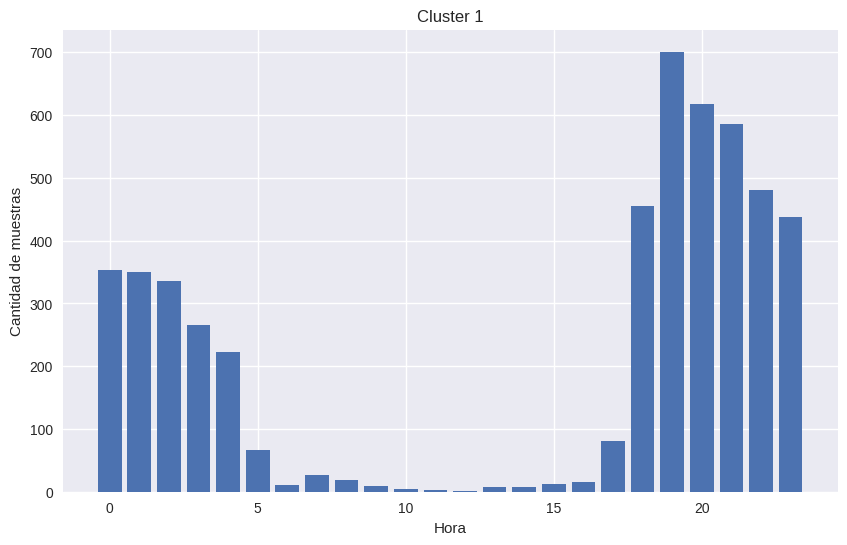

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster1['hora'], grupo_cluster1['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 1')
plt.show()

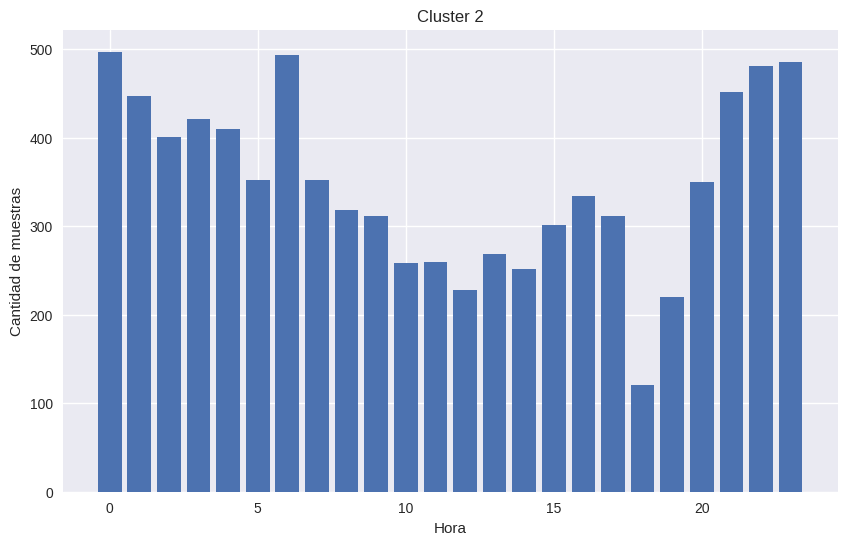

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster2['hora'], grupo_cluster2['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 2')
plt.show()

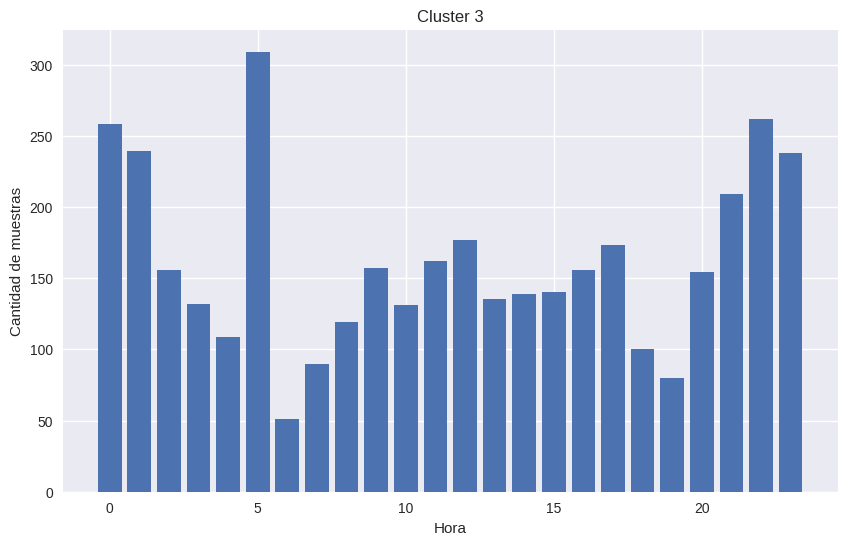

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster3['hora'], grupo_cluster3['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 3')
plt.show()

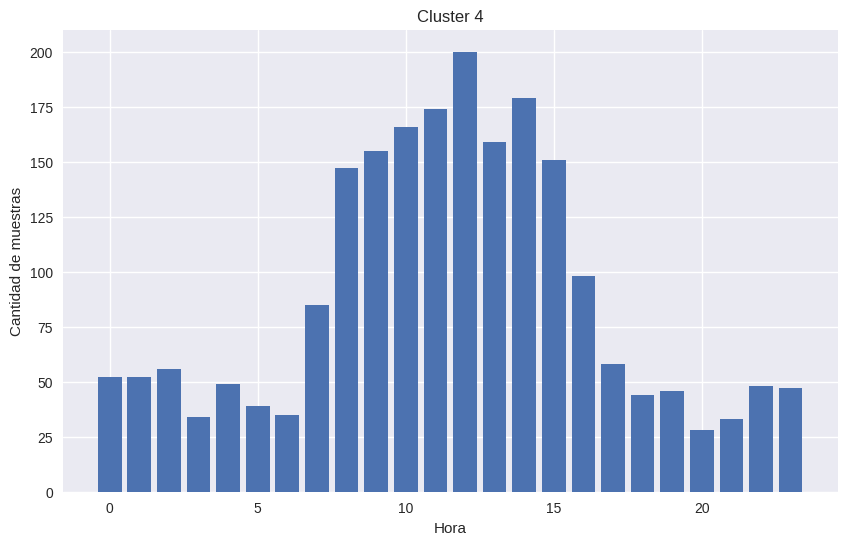

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster4['hora'], grupo_cluster4['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 4')
plt.show()

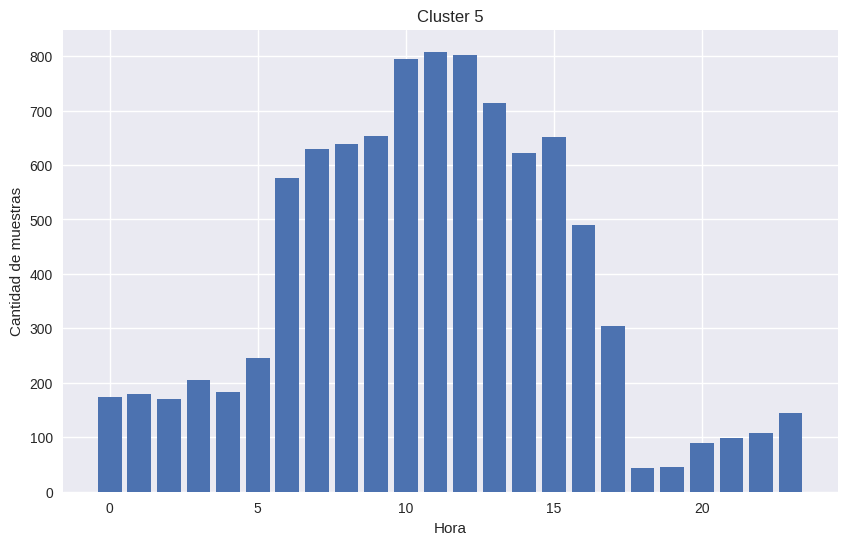

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster5['hora'], grupo_cluster5['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 5')
plt.show()

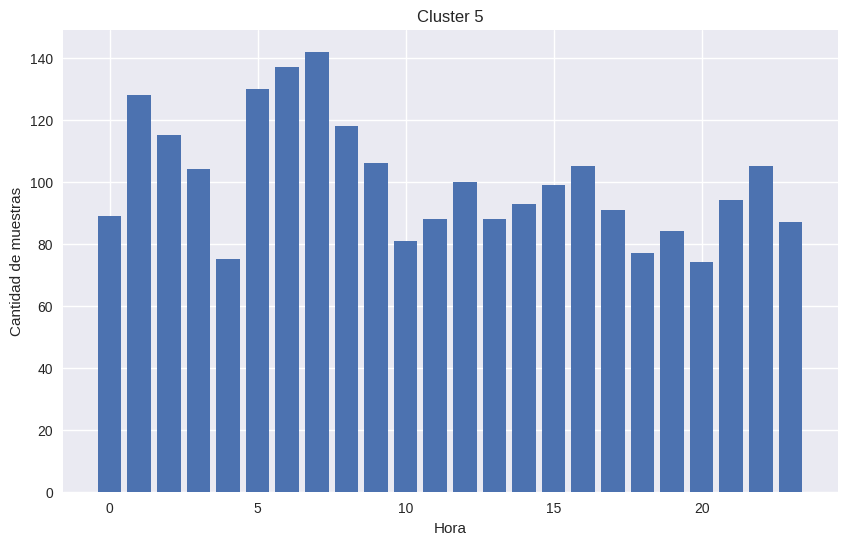

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster6['hora'], grupo_cluster6['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 5')
plt.show()

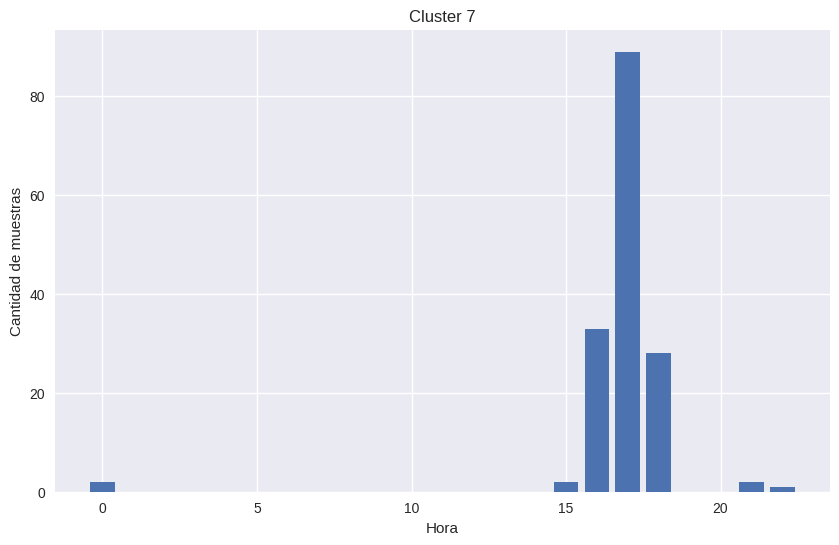

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster7['hora'], grupo_cluster7['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 7')
plt.show()

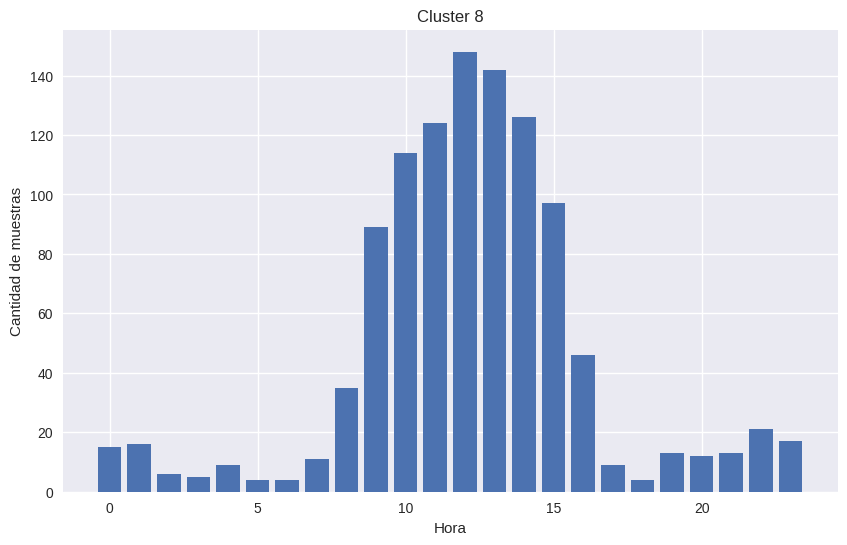

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster8['hora'], grupo_cluster8['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 8')
plt.show()

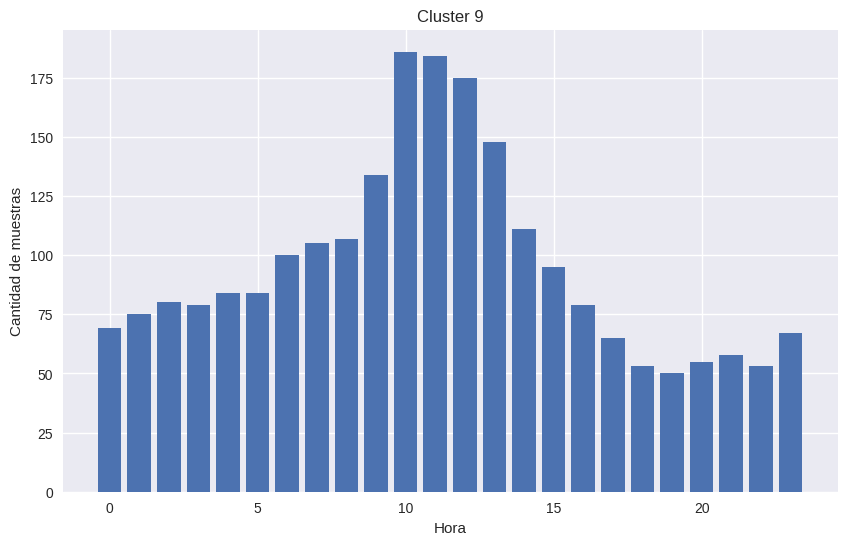

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster9['hora'], grupo_cluster9['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 9')
plt.show()

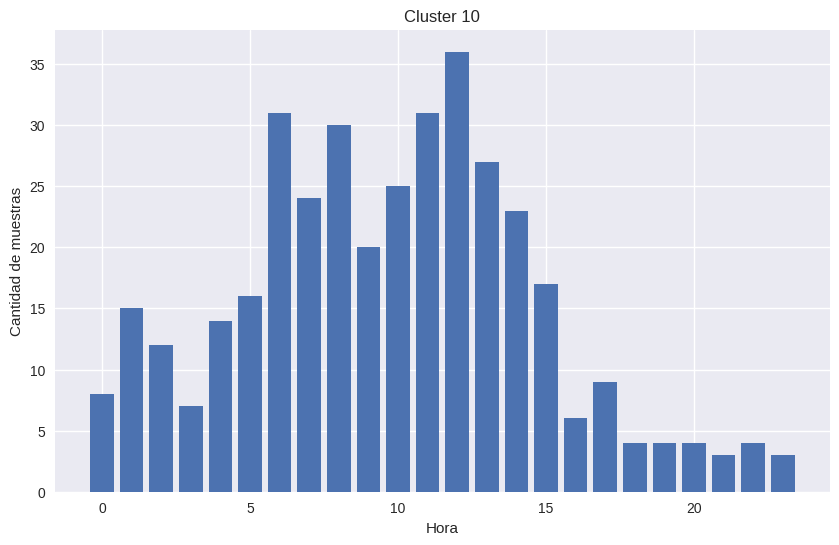

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster10['hora'], grupo_cluster10['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 10')
plt.show()

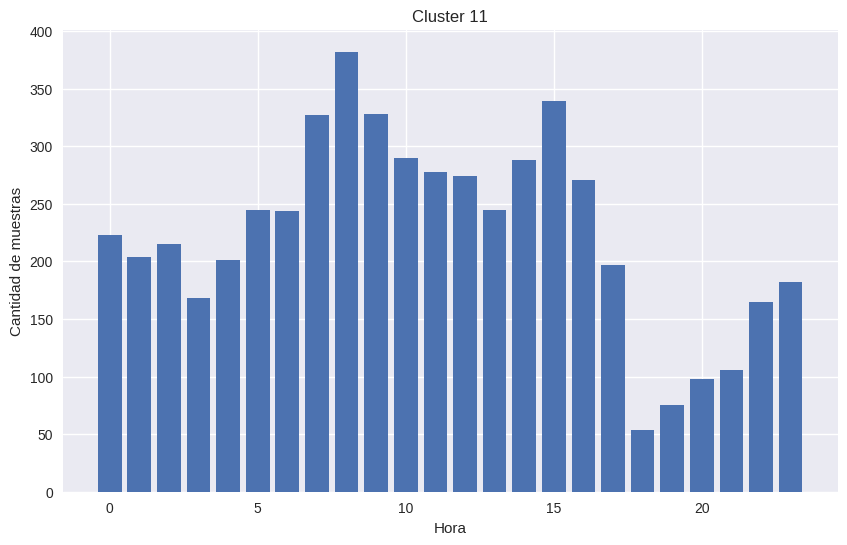

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster11['hora'], grupo_cluster11['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 11')
plt.show()

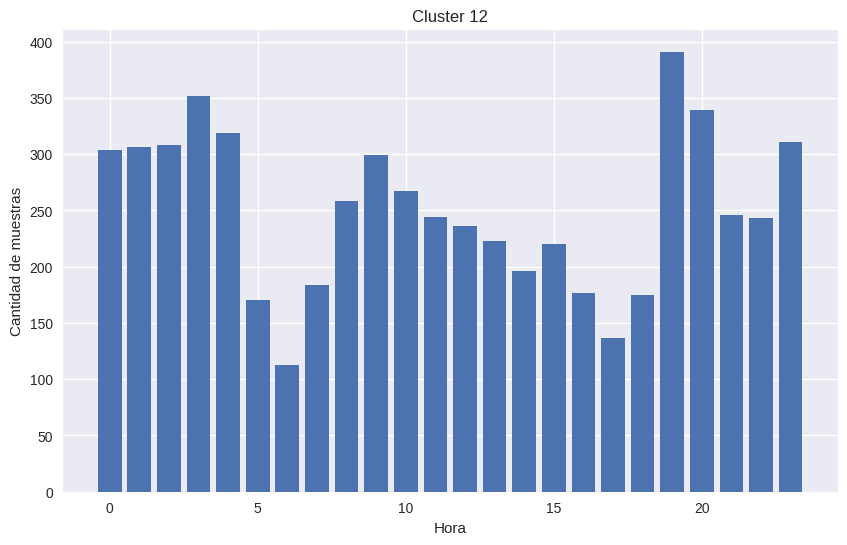

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster12['hora'], grupo_cluster12['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 12')
plt.show()

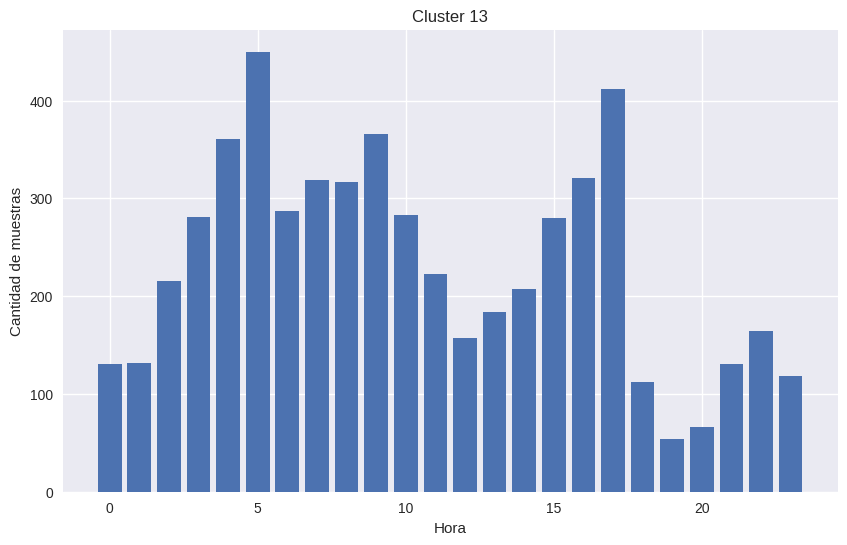

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grupo_cluster13['hora'], grupo_cluster13['cantidad'])
plt.xlabel('Hora')
plt.ylabel('Cantidad de muestras')
plt.title('Cluster 13')
plt.show()

# estudio de diferencias entre clusters

In [ ]:
grab_17_5=pd.read_csv("/content/drive/MyDrive/Doctorado/2023/Junio/grab_17_5meansites.csv")

## grab_17_5

In [ ]:
grab_17_5

,Unnamed: 0,site,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,AnthroEnergy,BioEnergy,BI,ADI,AEI,LFC,ACTspMean,hora
0,0,RZUA01,0.058744,-0.215319,-0.734450,-0.734450,-0.310880,0.595603,-0.510268,-0.086513,-0.146765,-0.037872,0.900937,0.433765,-0.592298,-0.510729,-0.445390,17.0
1,1,RZUA03b,-0.041011,-0.194568,0.015004,0.015004,-0.635086,0.151550,0.061854,-0.113200,-0.148199,-0.060694,0.062892,0.315547,-0.008599,-0.420616,-0.197504,17.5
2,2,RZUA04,0.076109,-0.206367,-0.324409,-0.324409,-0.346870,0.101721,-0.292004,-0.171406,-0.146029,-0.064411,-0.142574,-0.063860,0.748174,-0.421012,-0.305009,18.0
3,3,RZUA05,0.020624,-0.213156,0.404127,0.404127,-0.553408,0.340046,-0.420042,-0.070888,-0.148453,-0.040528,1.300805,0.384395,-0.278260,-0.125872,-0.281533,17.0
4,4,RZUA06,0.099226,-0.209594,-0.355224,-0.355224,-0.237624,0.161061,-0.462694,-0.103534,-0.148792,-0.055190,0.533180,0.429506,-0.530886,-0.629003,-0.326678,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,RZUH09,-0.002253,-0.213699,-0.349151,-0.349151,-0.553584,-0.111459,-0.379501,0.152890,-0.142391,0.069669,2.358105,0.388122,-0.281481,-0.558651,-0.080785,17.0
88,88,RZUH10,0.097322,-0.182575,-0.545737,-0.545737,-0.006286,-0.042671,-0.196849,-0.106118,-0.145131,-0.045351,0.858463,0.171020,0.322333,-0.302738,-0.036581,17.0
89,89,RZUH11,0.032875,-0.199079,0.517715,0.517715,-0.156456,0.315715,0.319689,-0.067706,-0.145028,-0.032951,0.605599,0.322439,-0.016710,-0.624458,0.480487,4.0
90,90,RZUH12,0.000675,-0.191305,1.046292,1.046292,0.215242,-0.024506,1.930883,-0.113092,-0.145725,-0.042427,1.029953,-0.103239,0.680351,-0.114015,0.830548,4.0


In [ ]:
DFperiods=grab_17_5.iloc[:,2:17]
DFperiods

,SKEWt,KURTt,ACTtFraction,ACTtCount,SKEWf,EPS_SKEW,ACI,rBA,AnthroEnergy,BioEnergy,BI,ADI,AEI,LFC,ACTspMean
0,0.058744,-0.215319,-0.734450,-0.734450,-0.310880,0.595603,-0.510268,-0.086513,-0.146765,-0.037872,0.900937,0.433765,-0.592298,-0.510729,-0.445390
1,-0.041011,-0.194568,0.015004,0.015004,-0.635086,0.151550,0.061854,-0.113200,-0.148199,-0.060694,0.062892,0.315547,-0.008599,-0.420616,-0.197504
2,0.076109,-0.206367,-0.324409,-0.324409,-0.346870,0.101721,-0.292004,-0.171406,-0.146029,-0.064411,-0.142574,-0.063860,0.748174,-0.421012,-0.305009
3,0.020624,-0.213156,0.404127,0.404127,-0.553408,0.340046,-0.420042,-0.070888,-0.148453,-0.040528,1.300805,0.384395,-0.278260,-0.125872,-0.281533
4,0.099226,-0.209594,-0.355224,-0.355224,-0.237624,0.161061,-0.462694,-0.103534,-0.148792,-0.055190,0.533180,0.429506,-0.530886,-0.629003,-0.326678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.002253,-0.213699,-0.349151,-0.349151,-0.553584,-0.111459,-0.379501,0.152890,-0.142391,0.069669,2.358105,0.388122,-0.281481,-0.558651,-0.080785
88,0.097322,-0.182575,-0.545737,-0.545737,-0.006286,-0.042671,-0.196849,-0.106118,-0.145131,-0.045351,0.858463,0.171020,0.322333,-0.302738,-0.036581
89,0.032875,-0.199079,0.517715,0.517715,-0.156456,0.315715,0.319689,-0.067706,-0.145028,-0.032951,0.605599,0.322439,-0.016710,-0.624458,0.480487
90,0.000675,-0.191305,1.046292,1.046292,0.215242,-0.024506,1.930883,-0.113092,-0.145725,-0.042427,1.029953,-0.103239,0.680351,-0.114015,0.830548


In [ ]:
DFperiods=DFperiods.drop("ACTtFraction",axis=1)

In [ ]:
DFperiods=DFperiods.drop("ACTtFraction",axis=1)

KeyError: ignored

In [ ]:
DFperiods.columns

Index(['SKEWt', 'KURTt', 'ACTtCount', 'SKEWf', 'EPS_SKEW', 'ACI', 'rBA',
       'AnthroEnergy', 'BioEnergy', 'BI', 'ADI', 'AEI', 'LFC', 'ACTspMean'],
      dtype='object')

In [ ]:
DFperiods=DFperiods[['SKEWt', 'KURTt',
       'ACI',   'BI', 'ADI', 'AEI', 'LFC',
       ]]

### Clustering With the recomended number of clusters

In [ ]:
X_train11=DFperiods.copy()


In [ ]:
DFperiods

,SKEWt,KURTt,ACI,BI,ADI,AEI,LFC
0,0.058744,-0.215319,-0.510268,0.900937,0.433765,-0.592298,-0.510729
1,-0.041011,-0.194568,0.061854,0.062892,0.315547,-0.008599,-0.420616
2,0.076109,-0.206367,-0.292004,-0.142574,-0.063860,0.748174,-0.421012
3,0.020624,-0.213156,-0.420042,1.300805,0.384395,-0.278260,-0.125872
4,0.099226,-0.209594,-0.462694,0.533180,0.429506,-0.530886,-0.629003
...,...,...,...,...,...,...,...
87,-0.002253,-0.213699,-0.379501,2.358105,0.388122,-0.281481,-0.558651
88,0.097322,-0.182575,-0.196849,0.858463,0.171020,0.322333,-0.302738
89,0.032875,-0.199079,0.319689,0.605599,0.322439,-0.016710,-0.624458
90,0.000675,-0.191305,1.930883,1.029953,-0.103239,0.680351,-0.114015


In [ ]:
rand=1
GM = GaussianMixture(n_components=3, random_state=5, covariance_type="full").fit(X_train11)
pred=GM.predict(X_train11)

In [ ]:
GM.feature_names_in_

array(['SKEWt', 'KURTt', 'ACI', 'BI', 'ADI', 'AEI', 'LFC'], dtype=object)

In [ ]:
X_train11["pd"]=pred

In [ ]:
X_train11

,SKEWt,KURTt,ACI,BI,ADI,AEI,LFC,pd
0,0.058744,-0.215319,-0.510268,0.900937,0.433765,-0.592298,-0.510729,2
1,-0.041011,-0.194568,0.061854,0.062892,0.315547,-0.008599,-0.420616,2
2,0.076109,-0.206367,-0.292004,-0.142574,-0.063860,0.748174,-0.421012,1
3,0.020624,-0.213156,-0.420042,1.300805,0.384395,-0.278260,-0.125872,2
4,0.099226,-0.209594,-0.462694,0.533180,0.429506,-0.530886,-0.629003,2
...,...,...,...,...,...,...,...,...
87,-0.002253,-0.213699,-0.379501,2.358105,0.388122,-0.281481,-0.558651,2
88,0.097322,-0.182575,-0.196849,0.858463,0.171020,0.322333,-0.302738,1
89,0.032875,-0.199079,0.319689,0.605599,0.322439,-0.016710,-0.624458,2
90,0.000675,-0.191305,1.930883,1.029953,-0.103239,0.680351,-0.114015,0


<Axes: >

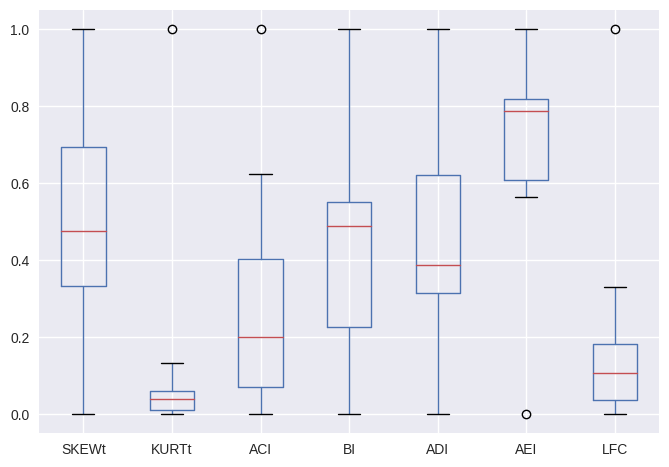

In [ ]:
dff=X_train11.loc[X_train11["pd"]==0].iloc[:,:7]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

<Axes: >

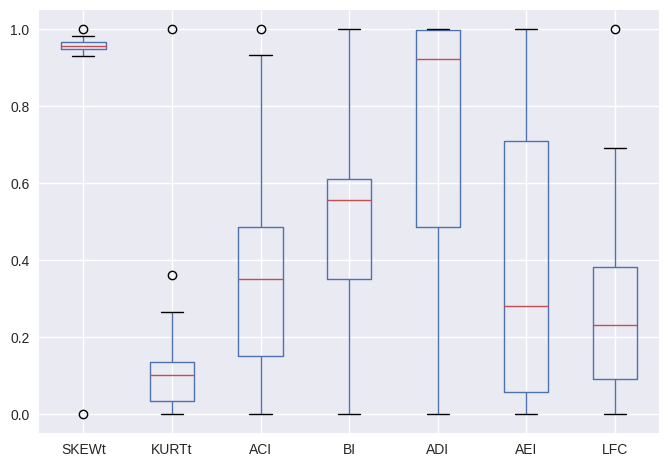

In [ ]:
dff=X_train11.loc[X_train11["pd"]==1].iloc[:,:7]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

<Axes: >

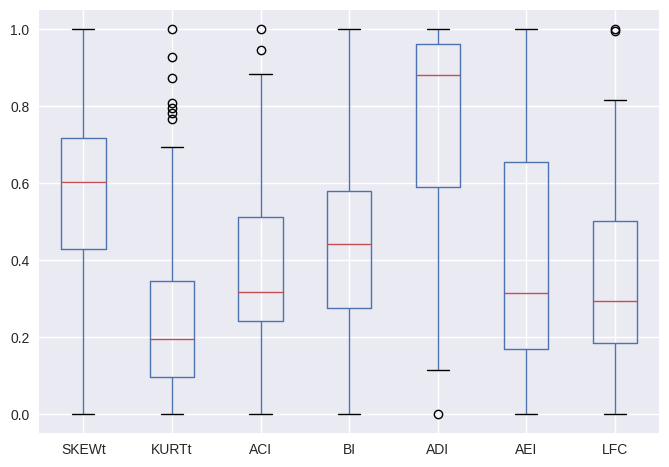

In [ ]:
dff=X_train11.loc[X_train11["pd"]==2].iloc[:,:7]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dff.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

scaled_features_df.boxplot()

In [ ]:
dff

,SKEWt,KURTt,ACI,BI,ADI,AEI,LFC
0,0.058744,-0.215319,-0.510268,0.900937,0.433765,-0.592298,-0.510729
1,-0.041011,-0.194568,0.061854,0.062892,0.315547,-0.008599,-0.420616
3,0.020624,-0.213156,-0.420042,1.300805,0.384395,-0.278260,-0.125872
4,0.099226,-0.209594,-0.462694,0.533180,0.429506,-0.530886,-0.629003
8,0.014498,-0.215821,-0.359038,1.362520,0.422977,-0.473211,-0.237130
9,0.035410,-0.216291,-0.613070,1.046095,0.435878,-0.636164,-0.609538
11,0.082128,-0.214048,-0.413146,0.850821,0.434619,-0.609850,-0.448382
12,-0.017503,-0.193178,-0.442499,0.613126,0.368873,-0.177573,-0.631572
13,0.036720,-0.212156,-0.273422,0.635277,0.344911,-0.087340,-0.540273
15,0.000818,-0.210550,-0.472982,-0.343313,0.374855,-0.202711,-0.317955


In [ ]:
X_train11.columns

Index(['SKEWt', 'KURTt', 'ACI', 'BI', 'ADI', 'AEI', 'LFC', 'pd'], dtype='object')

In [ ]:
X_train11.pd.unique()

array([2, 1, 0])

In [ ]:
X_train11[X_train11.pd==1]

,SKEWt,KURTt,ACI,BI,ADI,AEI,LFC,pd
2,0.076109,-0.206367,-0.292004,-0.142574,-0.063860,0.748174,-0.421012,1
5,-0.036444,-0.185577,0.452925,-0.073396,0.397243,-0.302063,0.086763,1
6,-0.076189,-0.214452,-0.516104,-0.358930,0.437579,-0.702003,-0.331590,1
14,0.003172,-0.178915,-0.042408,0.016809,0.410547,-0.386154,-0.430991,1
17,-0.039108,-0.184948,-0.100791,0.142783,0.155195,0.355797,-0.662301,1
20,0.032713,-0.205568,-0.589820,-0.791688,0.436291,-0.641986,-0.123896,1
21,-0.114451,-0.177537,-0.428303,0.210741,0.404222,-0.342590,-0.512607,1
25,-0.035619,-0.115008,-0.047333,-0.427467,0.181493,0.320873,-0.598273,1
27,-5.072071,0.066900,-0.493818,-0.942636,0.437306,-0.680333,-0.556972,1
32,0.131299,-0.196130,0.735536,-1.041793,0.403854,-0.332691,-0.466562,1


In [ ]:
GM.covariances_.shape

(3, 7, 7)

In [ ]:
GM.means_

array([[ 0.00922698, -0.16608804,  0.37650979,  0.8183928 ,  0.02855948,
         0.47544101, -0.09010596],
       [-0.20725558, -0.17767839, -0.14156117, -0.22625772,  0.3214193 ,
        -0.1784933 , -0.39299274],
       [ 0.02686296, -0.2093041 , -0.30523103,  0.79015466,  0.39090943,
        -0.34461963, -0.52056238]])

In [ ]:
GM.covariances_[0]

array([[ 2.55005520e-03, -1.83824317e-04, -7.51199682e-03,
        -1.51709957e-02,  4.27902941e-03, -7.71487705e-03,
        -1.24639470e-05],
       [-1.83824317e-04,  1.05778176e-02,  2.27395234e-02,
        -2.86863260e-02, -6.05363302e-03,  1.10427955e-02,
         7.25399317e-03],
       [-7.51199682e-03,  2.27395234e-02,  3.85622462e-01,
         4.73224082e-02, -3.61264969e-02,  5.33273060e-02,
         5.06058343e-02],
       [-1.51709957e-02, -2.86863260e-02,  4.73224082e-02,
         2.94767349e-01,  1.62254981e-02, -3.66063634e-02,
         3.35897964e-02],
       [ 4.27902941e-03, -6.05363302e-03, -3.61264969e-02,
         1.62254981e-02,  3.43211391e-02, -6.80598071e-02,
         6.16452729e-02],
       [-7.71487705e-03,  1.10427955e-02,  5.33273060e-02,
        -3.66063634e-02, -6.80598071e-02,  1.51303912e-01,
        -1.83748190e-01],
       [-1.24639470e-05,  7.25399317e-03,  5.06058343e-02,
         3.35897964e-02,  6.16452729e-02, -1.83748190e-01,
         3.9085221

## Method of differences between clusters

In [ ]:
def diff(GM, i,j):
  std_df1= np.diag(GM.covariances_[i])
  median_df1=GM.means_[i]

  std_df2=np.diag(GM.covariances_[j])
  median_df2=GM.means_[j]

  dff=(median_df1 - median_df2) / np.sqrt(std_df1**2 + std_df2**2)
  return dff

def normalize_distance(dff):
    min_dff = np.min(dff)
    max_dff = np.max(dff)
    dff_normalized = (dff - min_dff) / (max_dff - min_dff)
    return dff_normalized



In [ ]:
dff=diff(GM, 0,1)
dff_normalized = normalize_distance(dff)

In [ ]:
dff_normalized

array([0.75170139, 0.83502866, 0.85675574, 1.        , 0.        ,
       0.98828779, 0.8058995 ])

In [ ]:
np.round(dff_normalized, 2)

array([0.75, 0.84, 0.86, 1.  , 0.  , 0.99, 0.81])

In [ ]:
 GM.covariances_.shape

(3, 7, 7)

In [ ]:
dff=diff(GM, 0,2)
dff_normalized = normalize_distance(dff)
dff_normalized
np.round(dff_normalized, 2)

array([0.35, 0.93, 0.78, 0.68, 0.  , 1.  , 0.74])

In [ ]:
dff=diff(GM, 1,2)
dff_normalized = normalize_distance(dff)
dff_normalized
np.round(dff_normalized, 2)

array([0.24, 1.  , 0.34, 0.08, 0.  , 0.32, 0.36])

### Method of diference between variables

feature importance with covariance matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance_per_component(gmm, feature_names):
    # Calcular la varianza de cada variable en cada componente
    variances = gmm.covariances_.diagonal(axis1=1, axis2=2)

    # Calcular la suma de las varianzas de cada componente
    total_variances = np.sum(variances, axis=1)

    # Calcular la importancia relativa de cada variable en cada componente
    importance_per_variable = variances / total_variances[:, np.newaxis]

    # Crear un gráfico de barras por cada componente
    num_components, num_features = importance_per_variable.shape
    x = np.arange(num_features)

    for i in range(num_components):
        fig, ax = plt.subplots()
        ax.bar(x, importance_per_variable[i], tick_label=feature_names)
        ax.set_xlabel('Variables')
        ax.set_ylabel('Importancia relativa')
        ax.set_title(f'Importancia relativa de las variables en Componente {i+1}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()




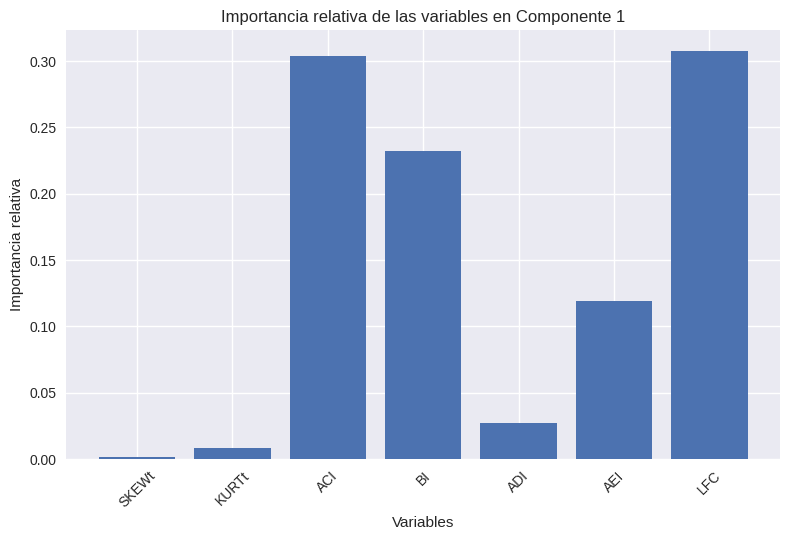

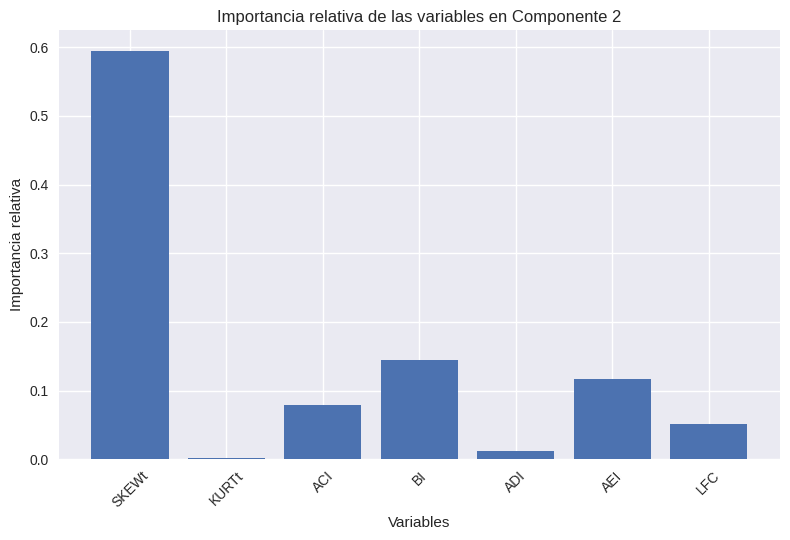

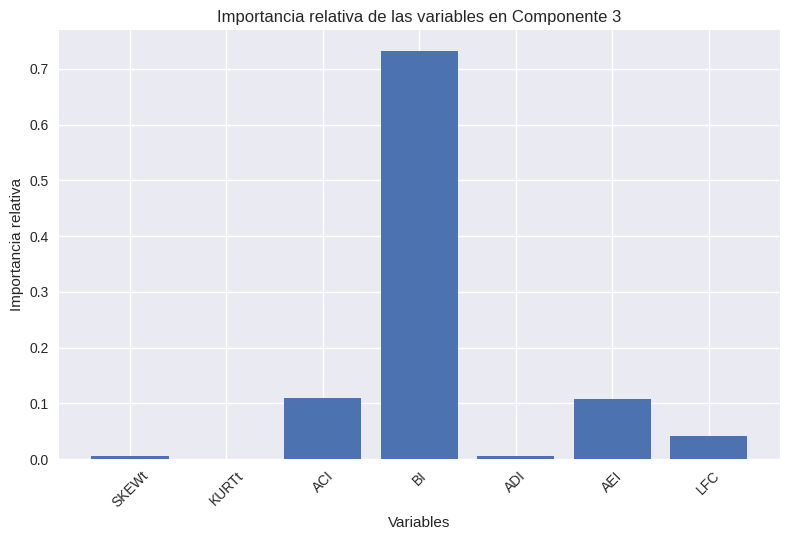

In [ ]:
plot_feature_importance_per_component(GM, GM.feature_names_in_)

In [ ]:
GM.feature_names_in_

array(['SKEWt', 'KURTt', 'ACI', 'BI', 'ADI', 'AEI', 'LFC'], dtype=object)

### Difference between means on each variable

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_differences(gmm, feature_names):
    # Get the mean vectors for each component
    mean_vectors = gmm.means_

    # Calculate the pairwise differences in means for each component
    num_components, num_features = mean_vectors.shape
    mean_differences = np.zeros((num_components, num_features, num_features))
    for i in range(num_components):
        for j in range(num_features):
            for k in range(num_features):
                mean_differences[i, j, k] = np.abs(mean_vectors[i, j] - mean_vectors[i, k])

    # Create correlation-like plots for each component
    for i in range(num_components):
        fig, ax = plt.subplots()
        im = ax.imshow(mean_differences[i], cmap='coolwarm')

        # Show all ticks and label them with the respective list entries
        ax.set_xticks(np.arange(num_features))
        ax.set_yticks(np.arange(num_features))
        ax.set_xticklabels(feature_names)
        ax.set_yticklabels(feature_names)
        ax.set_xlabel('Variables')
        ax.set_ylabel('Variables')
        ax.set_title(f'Difference in Means for Component {i+1}')
        plt.xticks(rotation=45)

        # Create colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Mean Differences', rotation=-90, va="bottom")

        plt.tight_layout()
        plt.show()



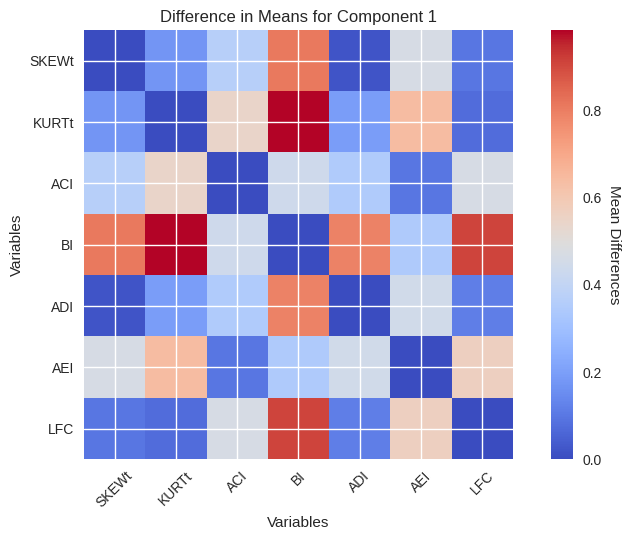

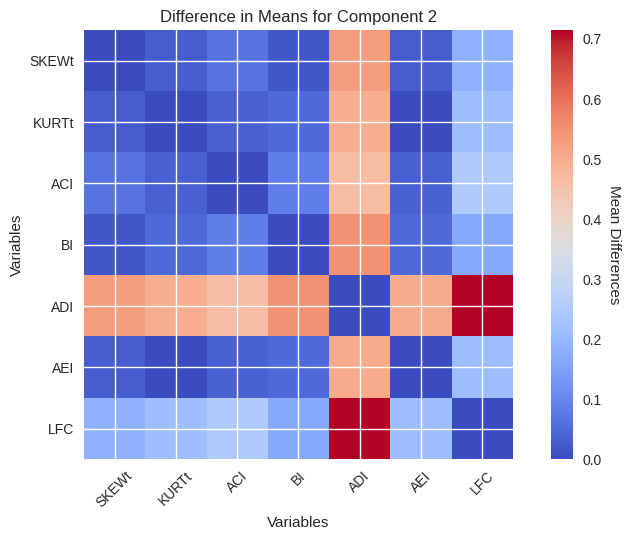

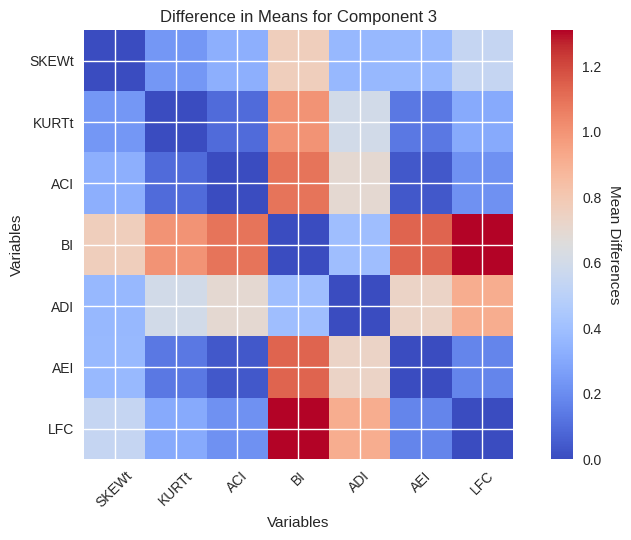

In [ ]:
plot_mean_differences(GM, GM.feature_names_in_)

In [ ]:
##

### correlation **Analisis**

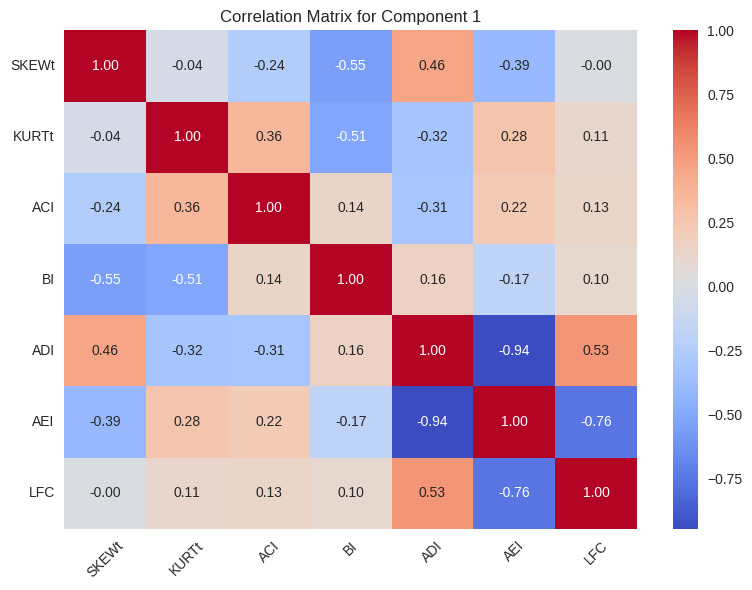

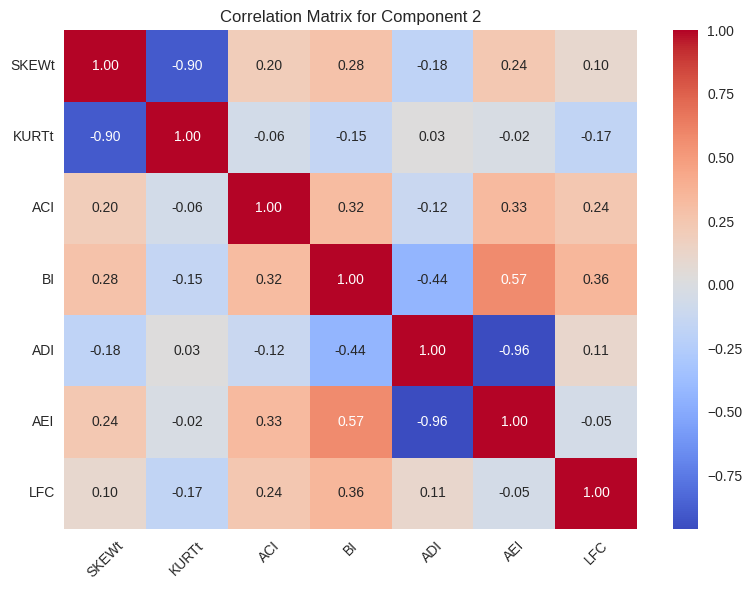

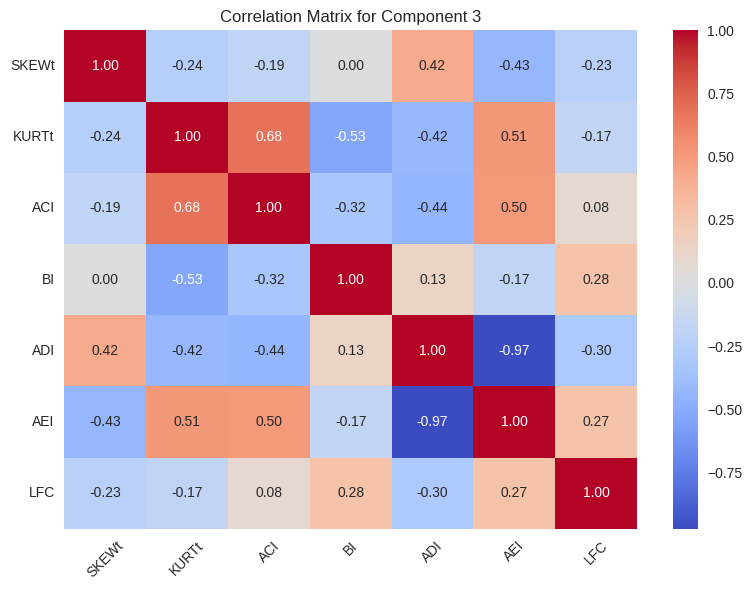

In [ ]:
from scipy.special import gamma

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_correlation_matrix(gmm):
    num_components, num_features = gmm.means_.shape
    correlation_matrices = np.zeros((num_components, num_features, num_features))

    for i in range(num_components):
        # Get the covariance matrix for the current component
        cov_matrix = gmm.covariances_[i]

        # Calculate the diagonal matrix of standard deviations (square root of variances)
        std_dev_matrix = np.sqrt(np.diag(np.diag(cov_matrix)))

        # Calculate the inverse of the diagonal matrix of standard deviations
        inv_std_dev_matrix = np.linalg.inv(std_dev_matrix)

        # Calculate the correlation matrix by scaling the covariance matrix
        correlation_matrix = np.dot(np.dot(inv_std_dev_matrix, cov_matrix), inv_std_dev_matrix)

        correlation_matrices[i] = correlation_matrix

    return correlation_matrices

def plot_correlation_matrices(correlation_matrices, feature_names):
    num_components = correlation_matrices.shape[0]

    for i in range(num_components):
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(correlation_matrices[i], annot=True, cmap='coolwarm', fmt=".2f",
                    xticklabels=feature_names, yticklabels=feature_names, ax=ax)
        ax.set_title(f"Correlation Matrix for Component {i+1}")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


correlation_matrices = calculate_correlation_matrix(GM)

# Graficar la matriz de correlación para cada componente
plot_correlation_matrices(correlation_matrices, GM.feature_names_in_)



## Clusters pair feature Difference

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_difference_of_means(gmm):
    num_components, num_features = gmm.means_.shape
    differences = np.zeros((num_components, num_features))

    for i in range(num_components):
        for j in range(num_components):
                print(i,j)
                # Get the mean for variable j in component i
                mean_j = gmm.means_[i]
                # Get the mean for variable k in component i
                mean_k = gmm.means_[j]

                # Calculate the difference of means
                differences[i] = mean_j - mean_k

    return differences

In [ ]:
def calculate_difference_of_means(gmm):
    num_components, num_features = gmm.means_.shape
    differences = np.zeros((num_components, num_features))
    count=0
    for i in range(num_components):

        for j in range(i+1, num_components):  # Cambiar el índice de inicio del segundo for

            print(i,j)
            # Get the mean for cluster i
            mean_i = gmm.means_[i]
            # Get the mean for cluster j
            mean_j = gmm.means_[j]

            # Calculate the difference of means between cluster i and cluster j
            differences[count] = mean_i - mean_j
            count += 1

    return differences

In [ ]:
 differences = np.abs(calculate_difference_of_means(GM))

0 1
0 2
1 2


In [ ]:
def plot_differences_as_changes(differences, component_names, feature_names):
    num_components, num_features = differences.shape
    width = 0.35

    for i in range(num_components):
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(  np.arange(len(differences[i])), differences[i],width, label=f'Component {component_names[i]}')
        ax.set_xlabel('Component Pair')
        ax.set_ylabel('Change in Means')
        ax.set_title(f'Change in Means for Variable  between Component Pairs')
        ax.set_xticks(range(num_features))
        ax.set_xticklabels(feature_names )
        ax.legend()
        plt.tight_layout()
        plt.show()

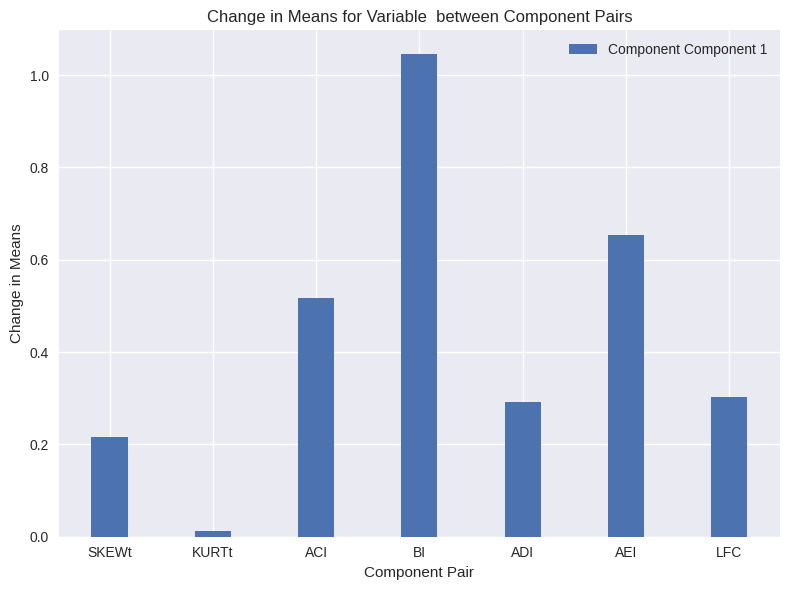

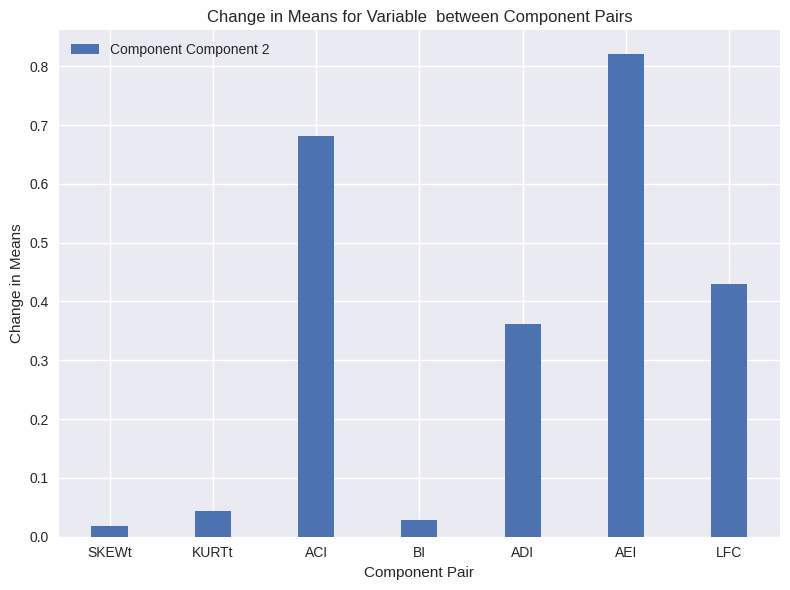

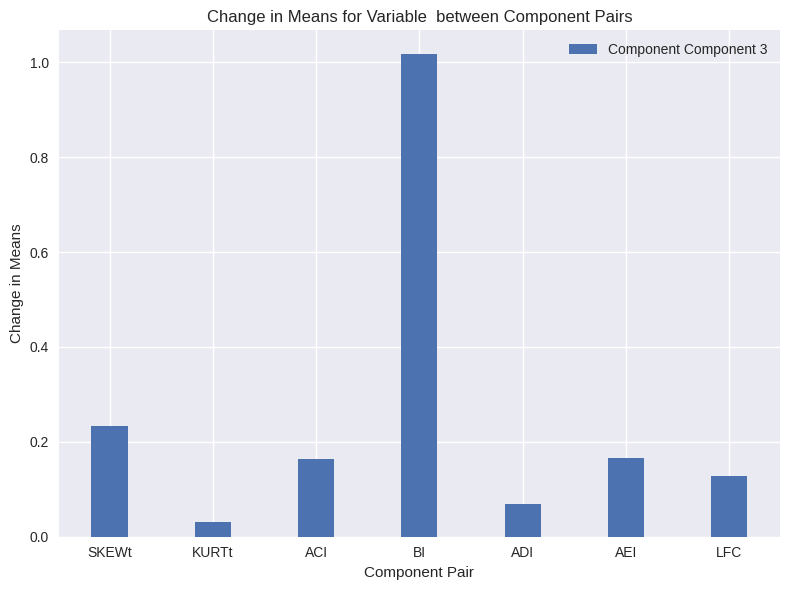

In [ ]:
plot_differences_as_changes(differences,component_names, np.array(GM.feature_names_in_))

In [ ]:
GM.sample(n_samples=1000, random_state=5)

TypeError: ignored

In [ ]:
import numpy as np
def calculate_difference_of_medians(gmm, data):
    num_components, num_features = gmm.means_.shape
    differences = np.zeros((num_components * (num_components - 1) // 2, num_features))
    count = 0
    for i in range(num_components):
        for j in range(i + 1, num_components):
            print(i, j)
            # Get the data points for cluster i
            cluster_i_data = data[gmm.predict(data) == i]
            # Get the data points for cluster j
            cluster_j_data = data[gmm.predict(data) == j]

            # Calculate the median for cluster i
            median_i = np.median(cluster_i_data, axis=0)
            # Calculate the median for cluster j
            median_j = np.median(cluster_j_data, axis=0)

            # Calculate the difference of medians between cluster i and cluster j
            differences[count] = median_i - median_j
            count += 1

    return differences

In [ ]:
 differences = np.abs(calculate_difference_of_medians(GM, X_train11.iloc[:,:-1]))

0 1
0 2
1 2


In [ ]:
differences



array([[0.01928176, 0.00959311, 0.32956516, 1.04463682, 0.40957641,
        0.91430368, 0.17449518],
       [0.02947765, 0.01391027, 0.54902615, 0.11913891, 0.42672369,
        1.03490116, 0.2767122 ],
       [0.04875941, 0.02350338, 0.21946099, 0.92549792, 0.01714728,
        0.12059748, 0.10221702]])

In [ ]:
def plot_differences_as_changes(differences, component_names, feature_names):
    num_components, num_features = differences.shape
    width = 0.35

    for i in range(num_components):
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(  np.arange(len(differences[i])), differences[i],width, label=f'Component {component_names[i]}')
        ax.set_xlabel('Component Pair')
        ax.set_ylabel('Change in Means')
        ax.set_title(f'Change in Means for Variable  between Component Pairs')
        ax.set_xticks(range(num_features))
        ax.set_xticklabels(feature_names )
        ax.legend()
        plt.tight_layout()
        plt.show()

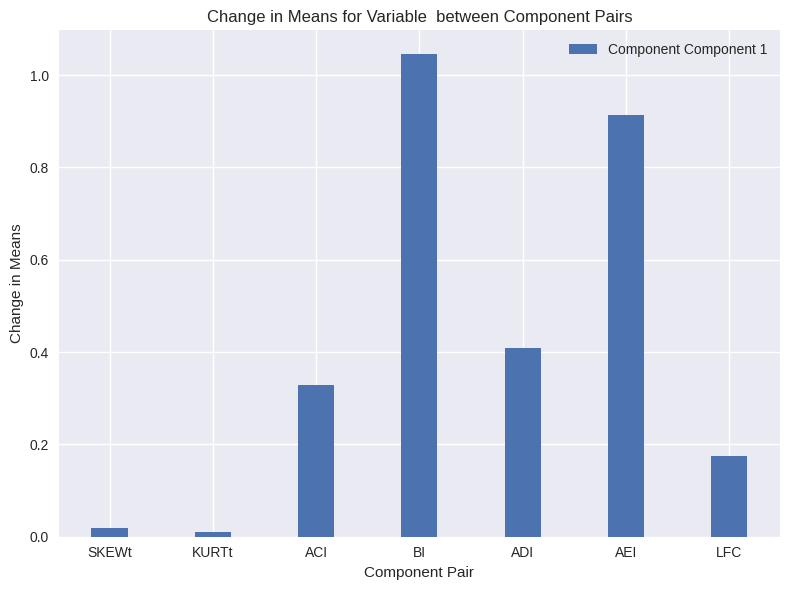

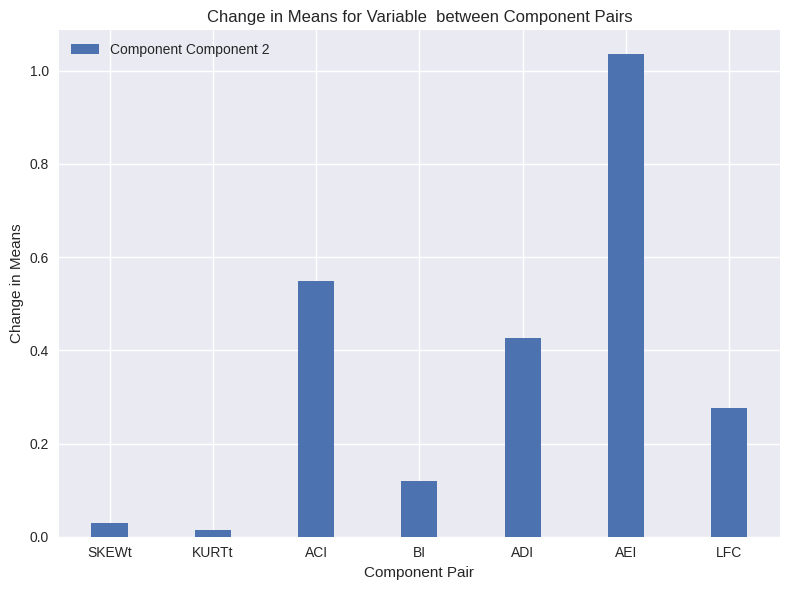

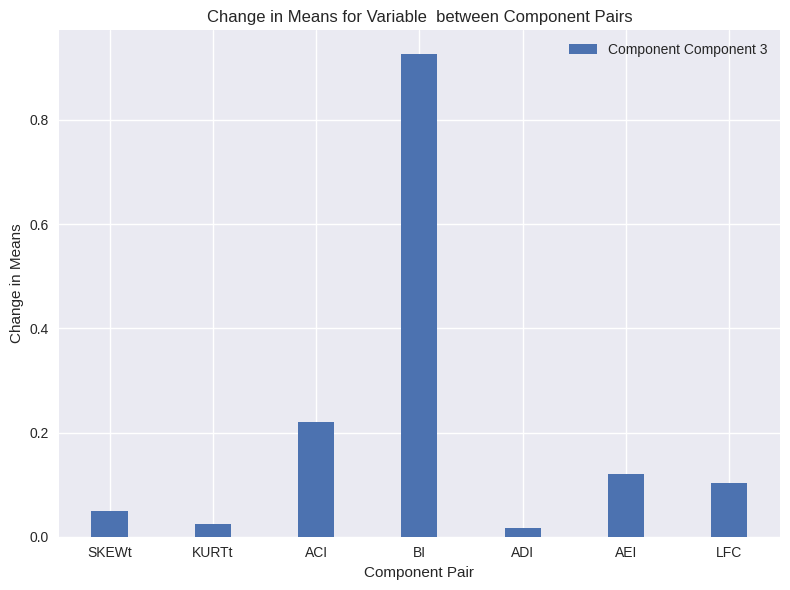

In [ ]:
plot_differences_as_changes(differences,component_names, np.array(GM.feature_names_in_))

### Calculate the difference of all clusters

In [ ]:
data=X_train11.iloc[:,:-1]
cluster_i_data = data[GM.predict(data) == 2]
median_i = np.median(cluster_i_data, axis=0)

In [ ]:
median_i

array([ 0.03420161, -0.21161797, -0.38650276,  0.85110335,  0.4156073 ,
       -0.4266711 , -0.56206029])

In [ ]:
differencs=differences[0]-median_i



In [ ]:
differencs=differencs.reshape(1,7)

In [ ]:
differencs.shape

(1, 7)

In [ ]:
def plot_differences_as_changes(differences, component_names, feature_names):
    num_components, num_features = differences.shape
    width = 0.35

    for i in range(num_components):
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(  np.arange(len(differences[i])), differences[i],width, label=f'Component {component_names[i]}')
        ax.set_xlabel('Component Pair')
        ax.set_ylabel('Change in Means')
        ax.set_title(f'Change in Means for Variable  between Component Pairs')
        ax.set_xticks(range(num_features))
        ax.set_xticklabels(feature_names )
        ax.legend()
        plt.tight_layout()
        plt.show()

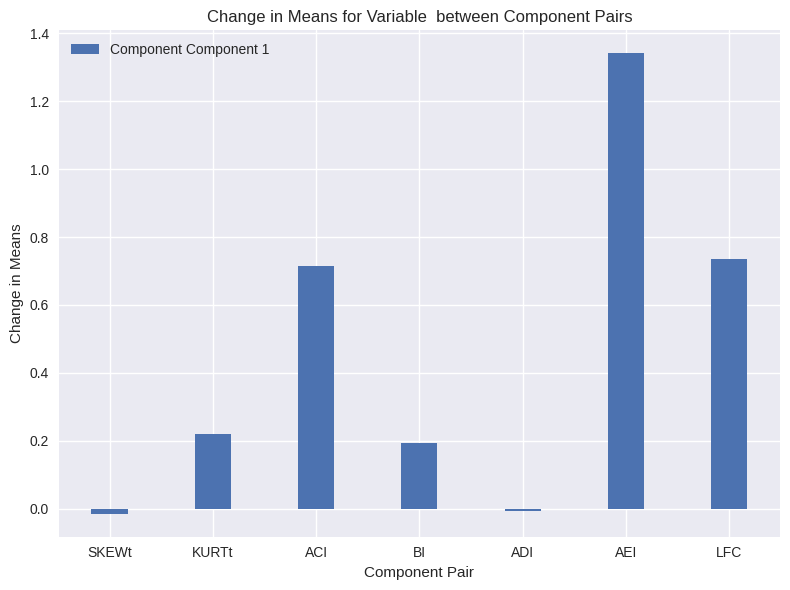

In [ ]:
plot_differences_as_changes(differencs,component_names, np.array(GM.feature_names_in_))